## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 6
## SVM

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

### 2. Import dataset 

In [2]:
df = pd.read_csv("pulsar_data.csv")

### 3. Explore the data to gain insights about the data 
##### View dimension

In [3]:
df.shape

(12528, 9)

##### preview the dataset

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


##### view the column names of the data frame

In [5]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

##### remove leading spaces from column names

In [6]:
df = df.rename(columns=lambda x: x.strip())
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


##### rename column names

In [7]:
df.set_axis(['Mean IP', 'SD IP', 'Kurtosis IP', 'Skewness IP', 'Mean curve', 'SD curve', 'Kurtosis curve', 'Skewness curve', 'target'], axis='columns', inplace=True)
df.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean curve,SD curve,Kurtosis curve,Skewness curve,target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


##### check the distribution of the target_class column

In [8]:
df['target'].value_counts()

0.0    11375
1.0     1153
Name: target, dtype: int64

##### View the percentage distribution of the target_class column

In [9]:
df['target'].value_counts() * 100 /df['target'].count()

0.0    90.796616
1.0     9.203384
Name: target, dtype: float64

##### View the summary of the dataset

In [10]:
df.describe()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean curve,SD curve,Kurtosis curve,Skewness curve,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


##### Explore missing values in variables

In [11]:
df.isnull().sum()

Mean IP              0
SD IP                0
Kurtosis IP       1735
Skewness IP          0
Mean curve           0
SD curve          1178
Kurtosis curve       0
Skewness curve     625
target               0
dtype: int64

In [12]:
df['Kurtosis IP'] = df['Kurtosis IP'].fillna(df['Kurtosis IP'].mean()) 
df['SD curve'] = df['SD curve'].fillna(df['SD curve'].mean()) 
df['Skewness curve'] = df['Skewness curve'].fillna(df['Skewness curve'].mean()) 

##### view summary statistics in numerical variables

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mean IP         12528 non-null  float64
 1   SD IP           12528 non-null  float64
 2   Kurtosis IP     12528 non-null  float64
 3   Skewness IP     12528 non-null  float64
 4   Mean curve      12528 non-null  float64
 5   SD curve        12528 non-null  float64
 6   Kurtosis curve  12528 non-null  float64
 7   Skewness curve  12528 non-null  float64
 8   target          12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


##### draw boxplots to visualize outliers

<AxesSubplot:>

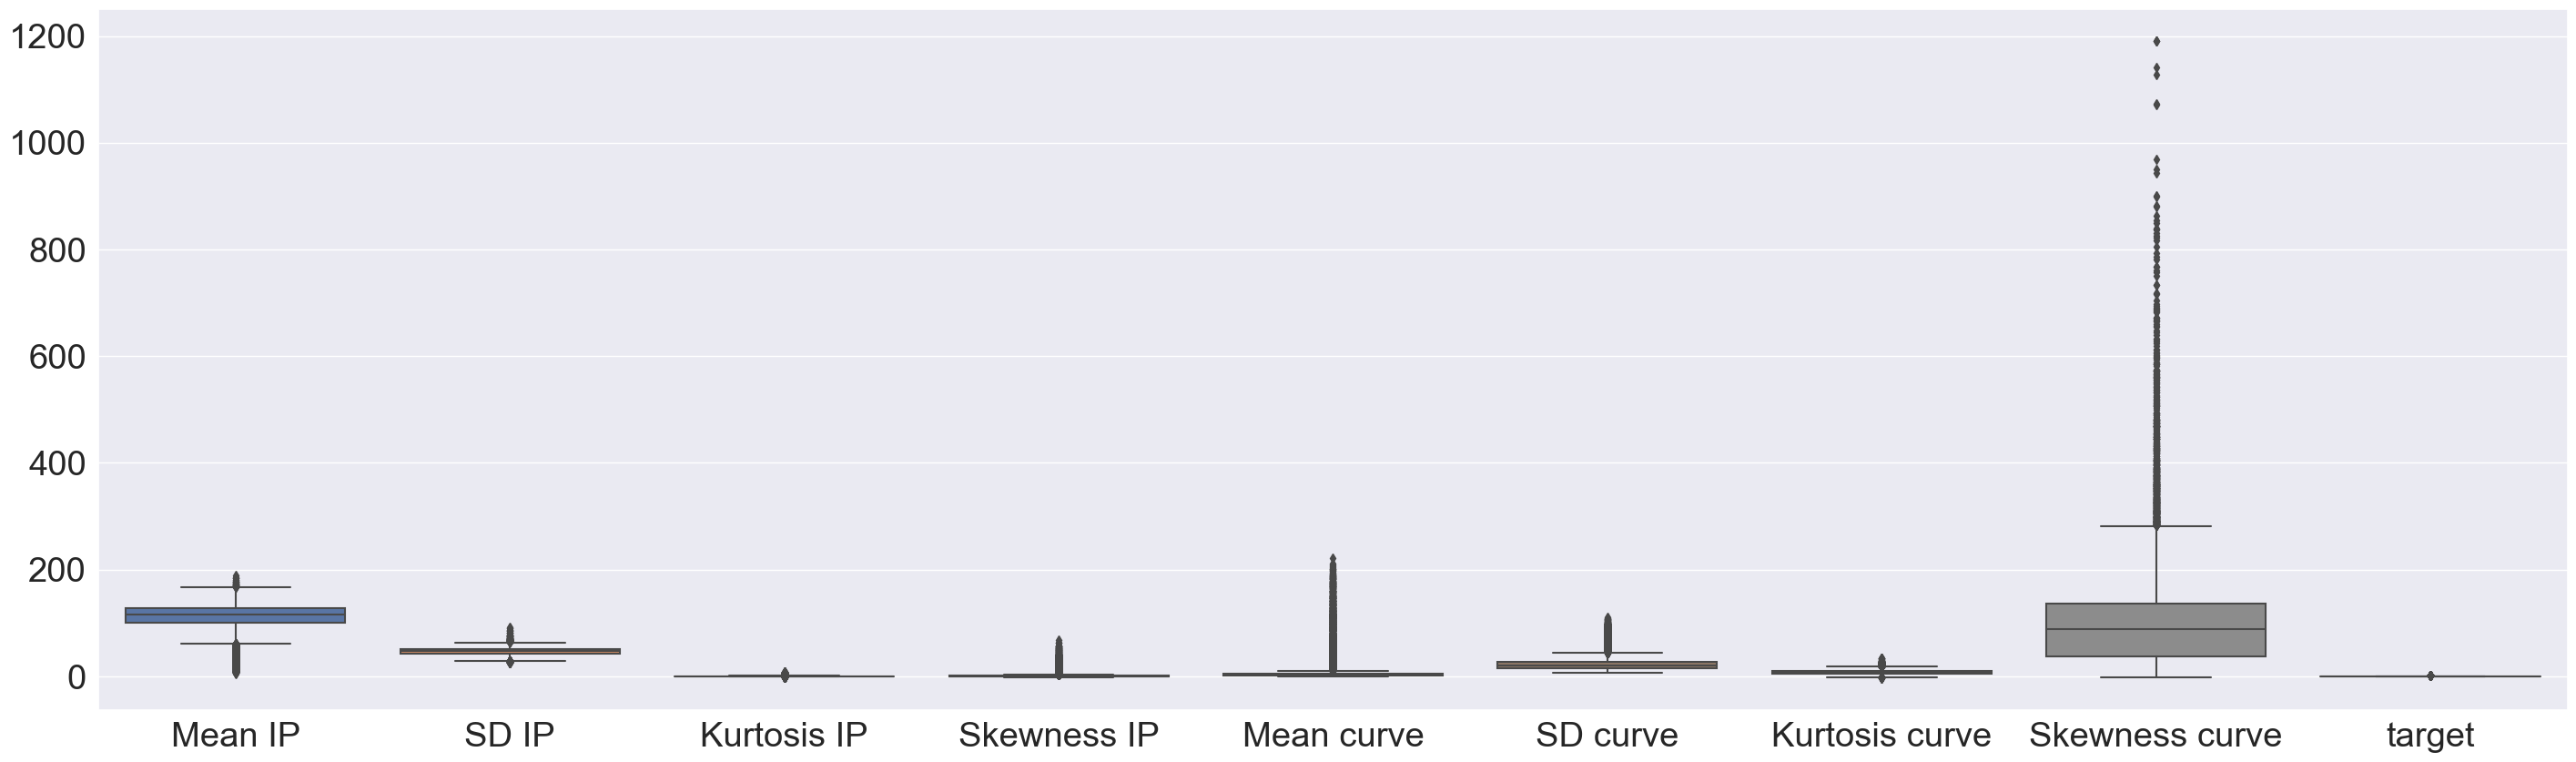

In [14]:
sns.set(rc={"figure.figsize":(35, 10)})
sns.set(font_scale=2.5)
sns.boxplot(data=df)

### 4. Check the distribution of variables

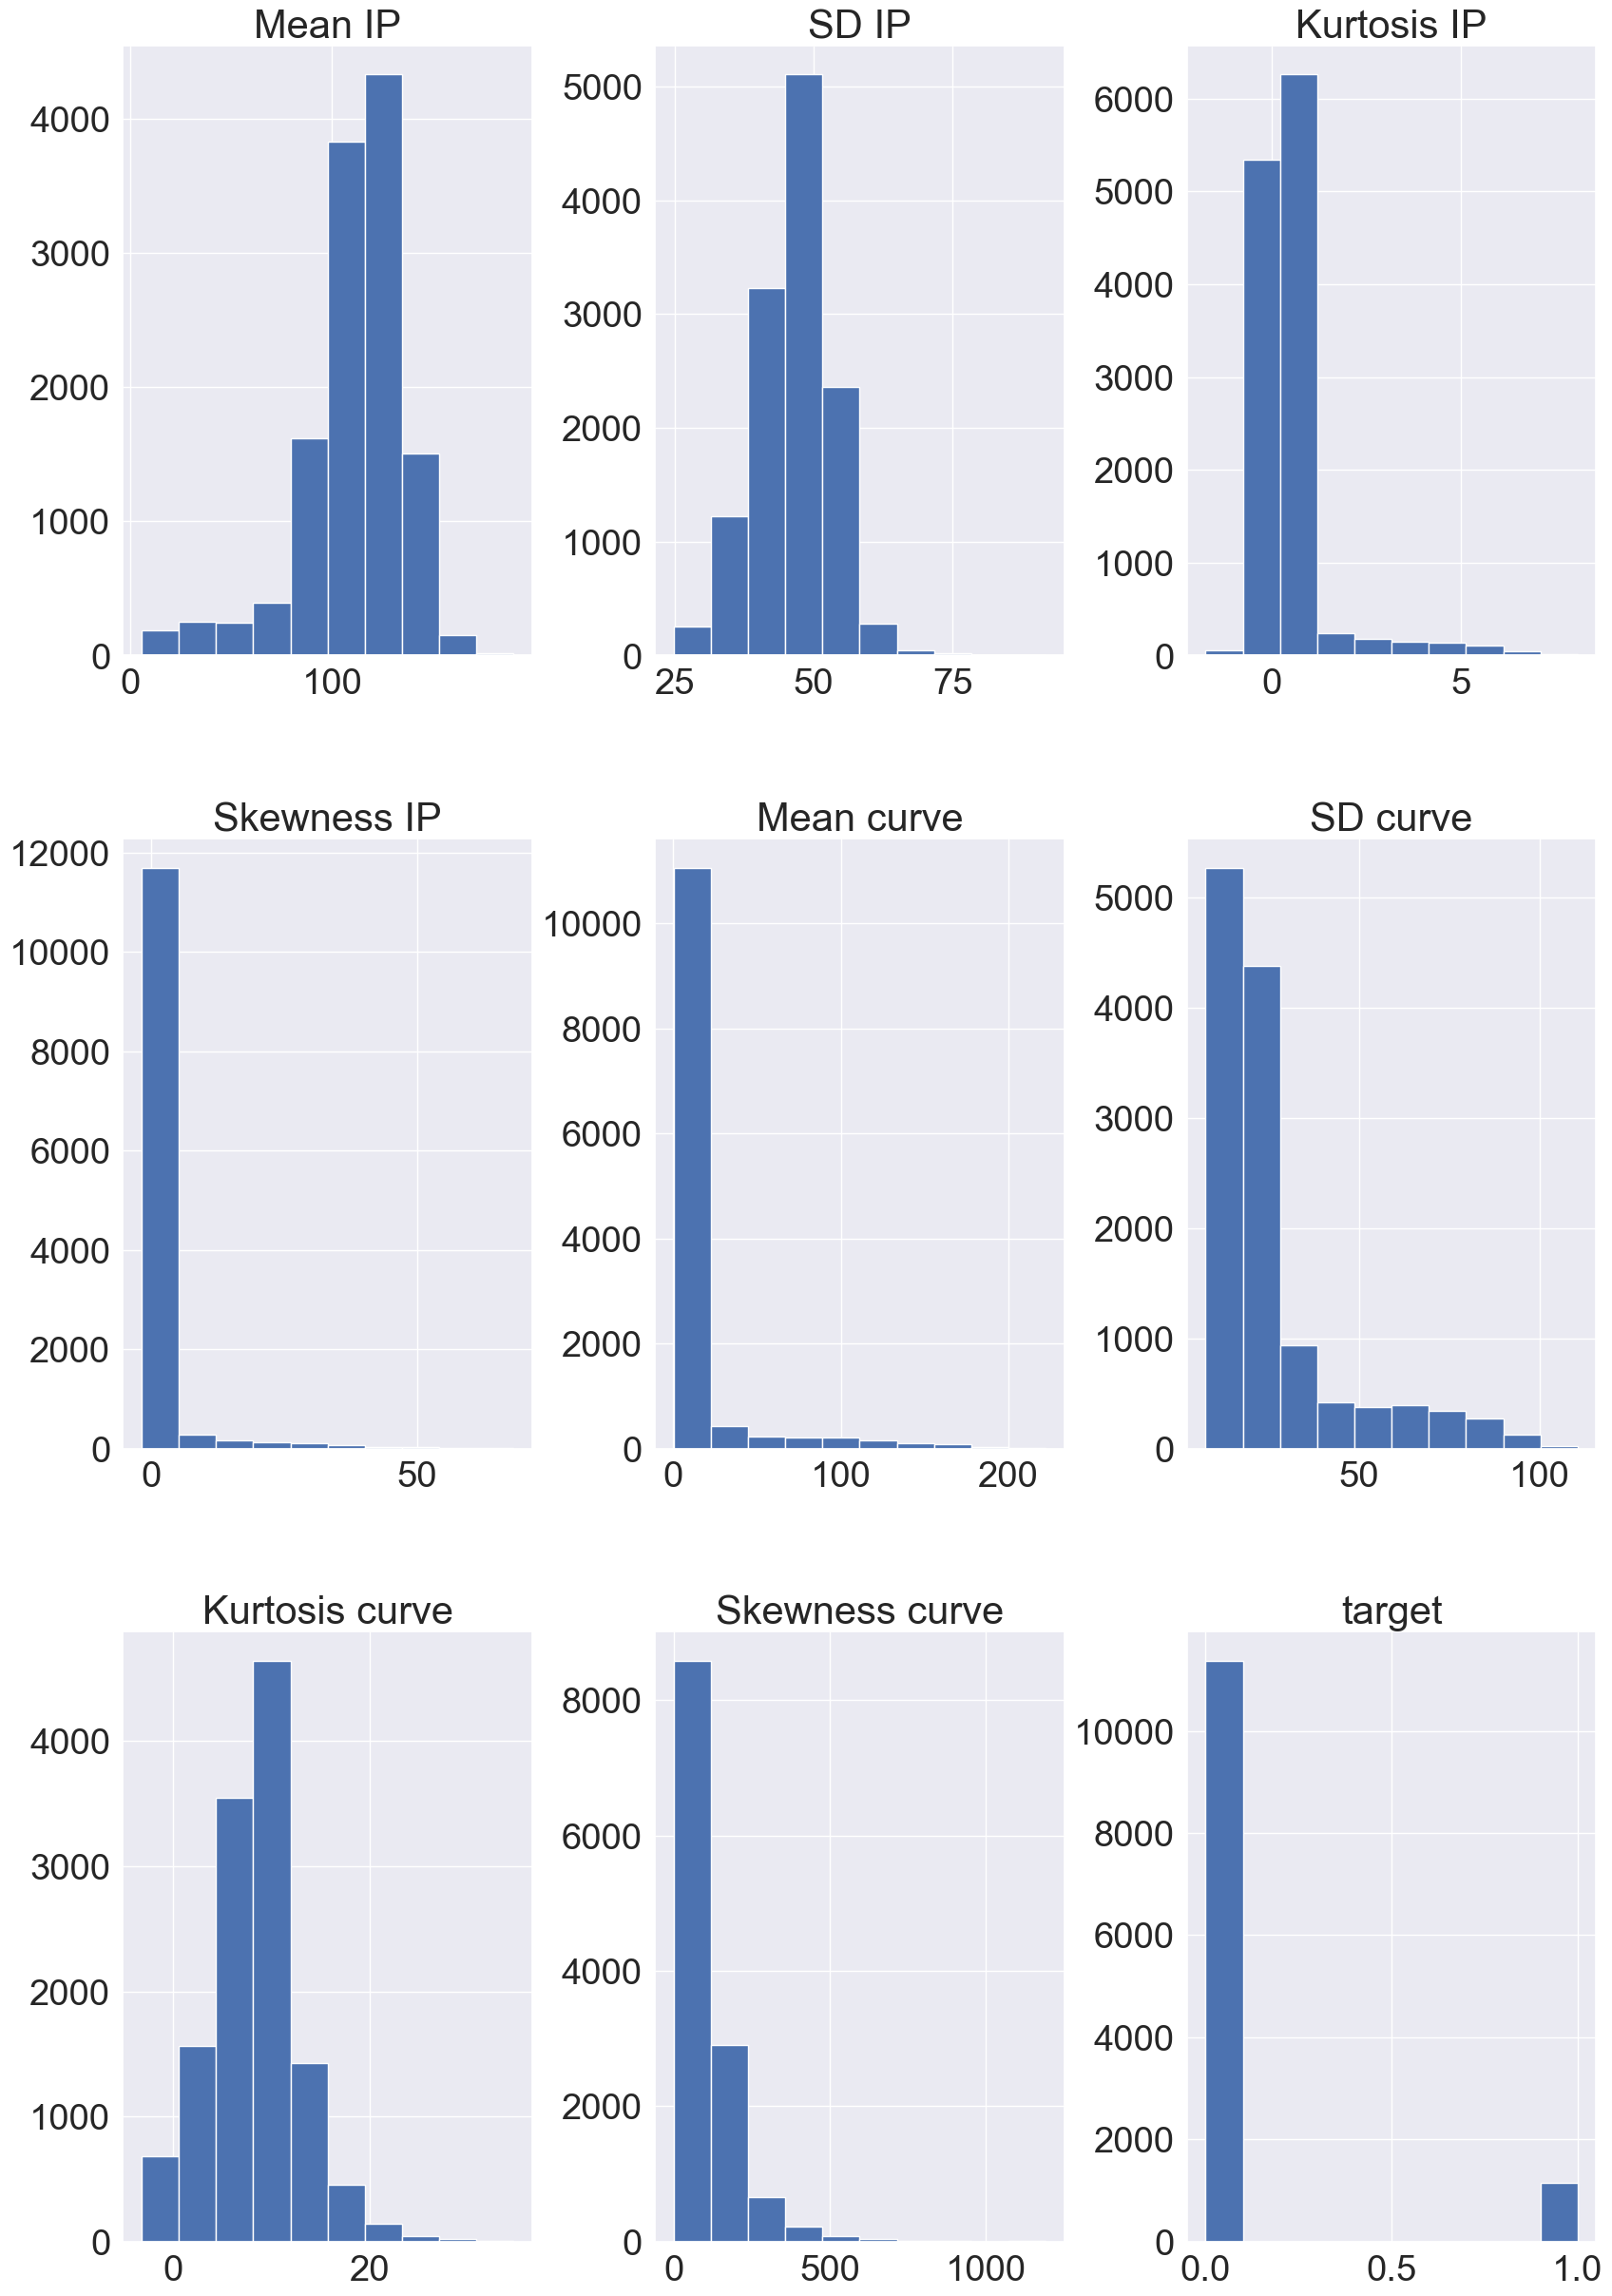

In [15]:
df.hist(figsize=(20,30))
plt.show()

### 5. Split data into separate training and test set 

In [16]:
x = df.drop('target', axis=1)
y = df['target']
print(x)
print(y)

          Mean IP      SD IP  Kurtosis IP  Skewness IP  Mean curve   SD curve  \
0      121.156250  48.372971     0.375485    -0.013165    3.168896  18.399367   
1       76.968750  36.175557     0.712898     3.388719    2.399666  17.570997   
2      130.585938  53.229534     0.133408    -0.297242    2.743311  22.362553   
3      156.398438  48.865942    -0.215989    -0.171294   17.471572  26.351318   
4       84.804688  36.117659     0.825013     3.274125    2.790134  20.618009   
...           ...        ...          ...          ...         ...        ...   
12523  124.312500  53.179053    -0.012418    -0.556021    7.186455  29.308266   
12524  115.617188  46.784600     0.218177     0.226757    6.140468  26.351318   
12525  116.031250  43.213846     0.663456     0.433088    0.785117  11.628149   
12526  135.664062  49.933749    -0.089940    -0.226726    3.859532  21.501505   
12527  120.726562  50.472256     0.346178     0.184797    0.769231  11.792603   

       Kurtosis curve  Skew

### 6. Feature Scaling

In [17]:
scaler = MinMaxScaler()
scale = scaler.fit(x)

In [18]:
x = scale.transform(x)
print(x)

[[0.62713448 0.35206043 0.21549796 ... 0.10679524 0.28103484 0.05627621]
 [0.38688302 0.17010882 0.24990139 ... 0.09877398 0.33317986 0.08776354]
 [0.67840455 0.42450688 0.19081528 ... 0.14517152 0.30912705 0.06371309]
 ...
 [0.59926939 0.27510059 0.24486016 ... 0.04122827 0.53595964 0.26335888]
 [0.70601478 0.37534292 0.16804214 ... 0.13683383 0.27966859 0.05390795]
 [0.62479823 0.38337595 0.21250979 ... 0.04282071 0.55206955 0.27789703]]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
C_val = [1.0, 100.0, 1000.0]

### 7. Run SVM with default hyperparameters 
#### Run SVM with rbf kernel and C=1.0 and gamma=auto 
#### Run SVM with rbf kernel and C=100.0
#### Run SVM with rbf kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 21. Stratified k-fold cross-validation with shuffle split with rbf kernel

C value =  1.0
Train Accuracy = 0.9709202873759836
Test Accuracy = 0.9720670391061452

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3406
         1.0       0.98      0.72      0.83       353

    accuracy                           0.97      3759
   macro avg       0.98      0.86      0.91      3759
weighted avg       0.97      0.97      0.97      3759

Classification accuracy = 0.9720670391061452
Classification error = 0.027932960893854775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


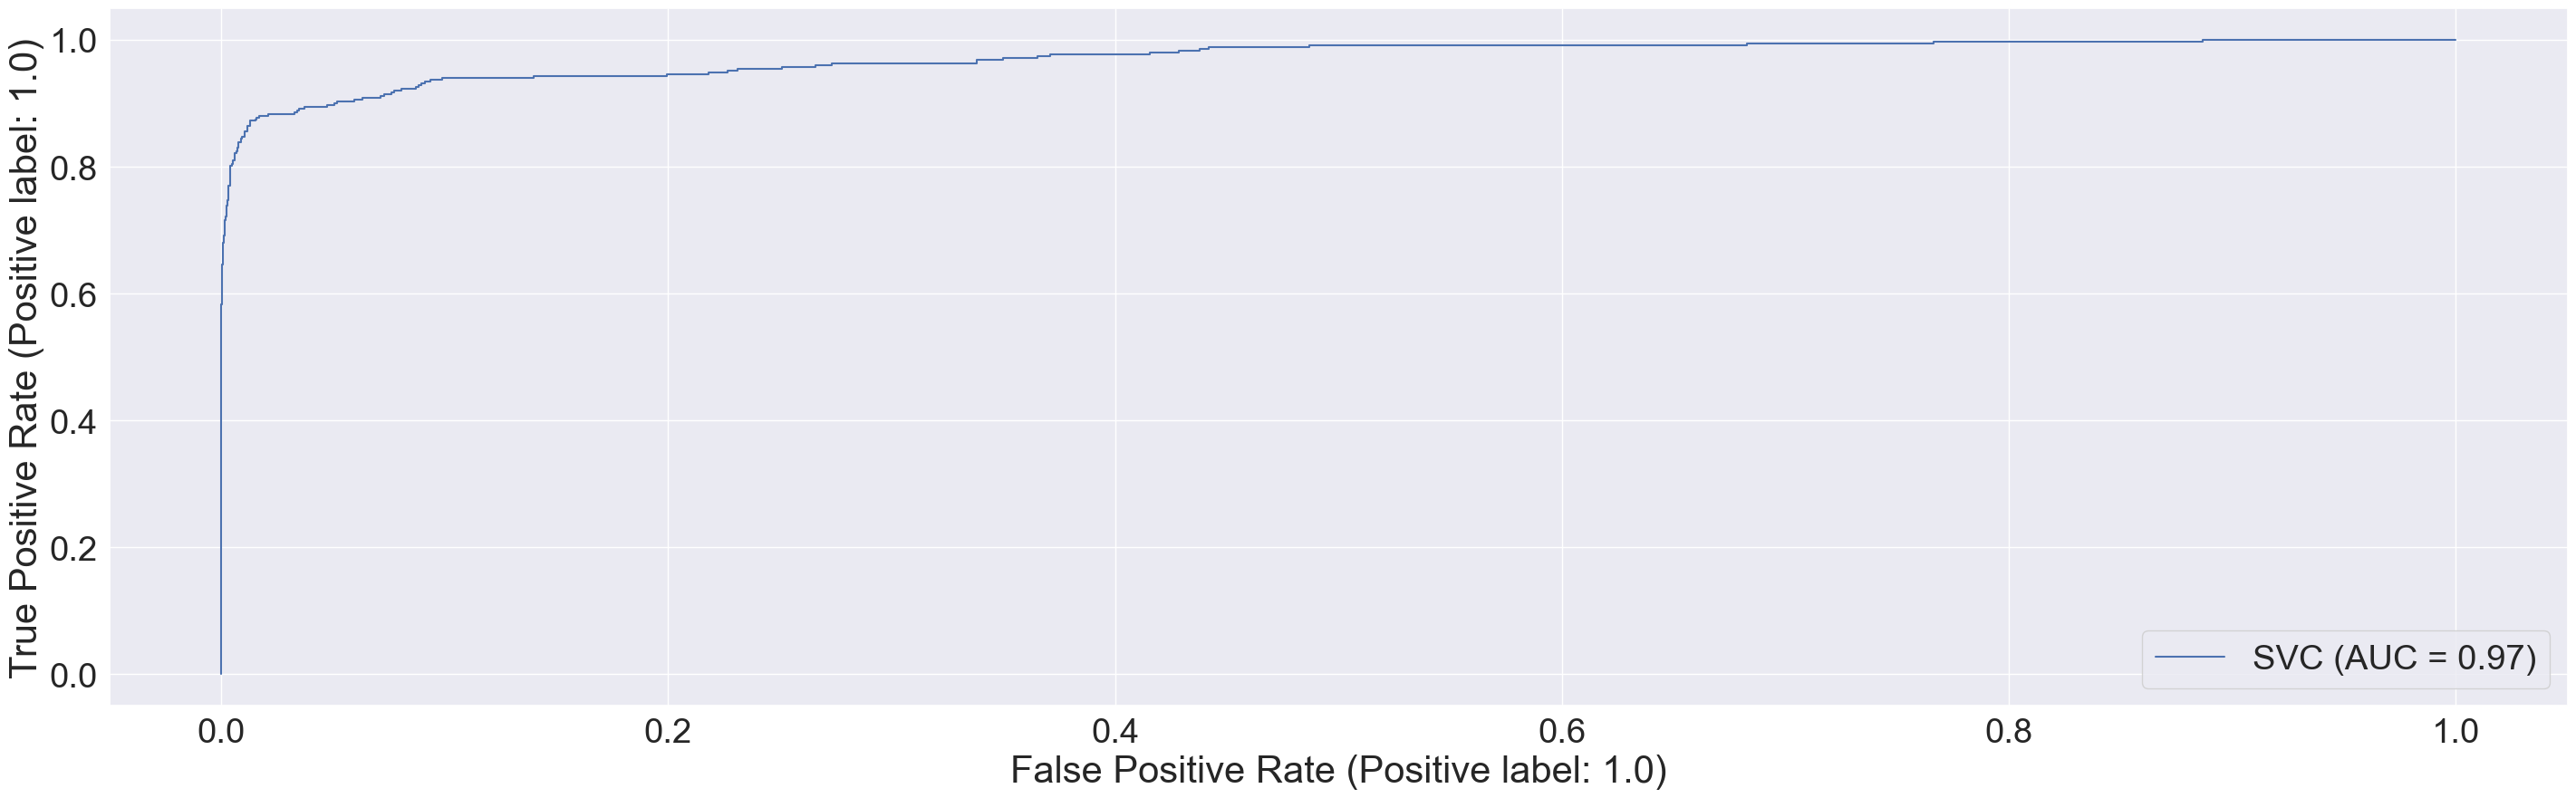

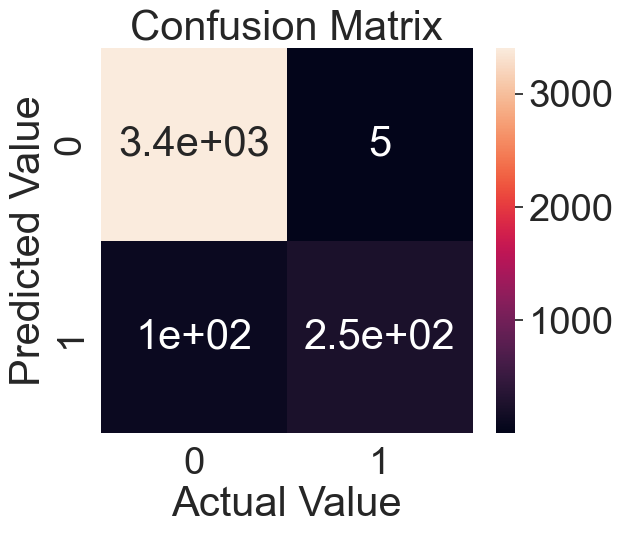

List of possible accuracy: [0.9748563218390804, 0.969588122605364, 0.9691091954022989]

Maximum Accuracy: 97.48563218390804 %
Minimum Accuracy: 96.91091954022988 %
Overall Accuracy: 97.1184546615581 %
Standard Deviation is: 0.0031888544628732494




C value =  100.0
Train Accuracy = 0.9770783441669517
Test Accuracy = 0.9781856876828944

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.97      0.79      0.87       353

    accuracy                           0.98      3759
   macro avg       0.98      0.89      0.93      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.9781856876828944
Classification error = 0.021814312317105622


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


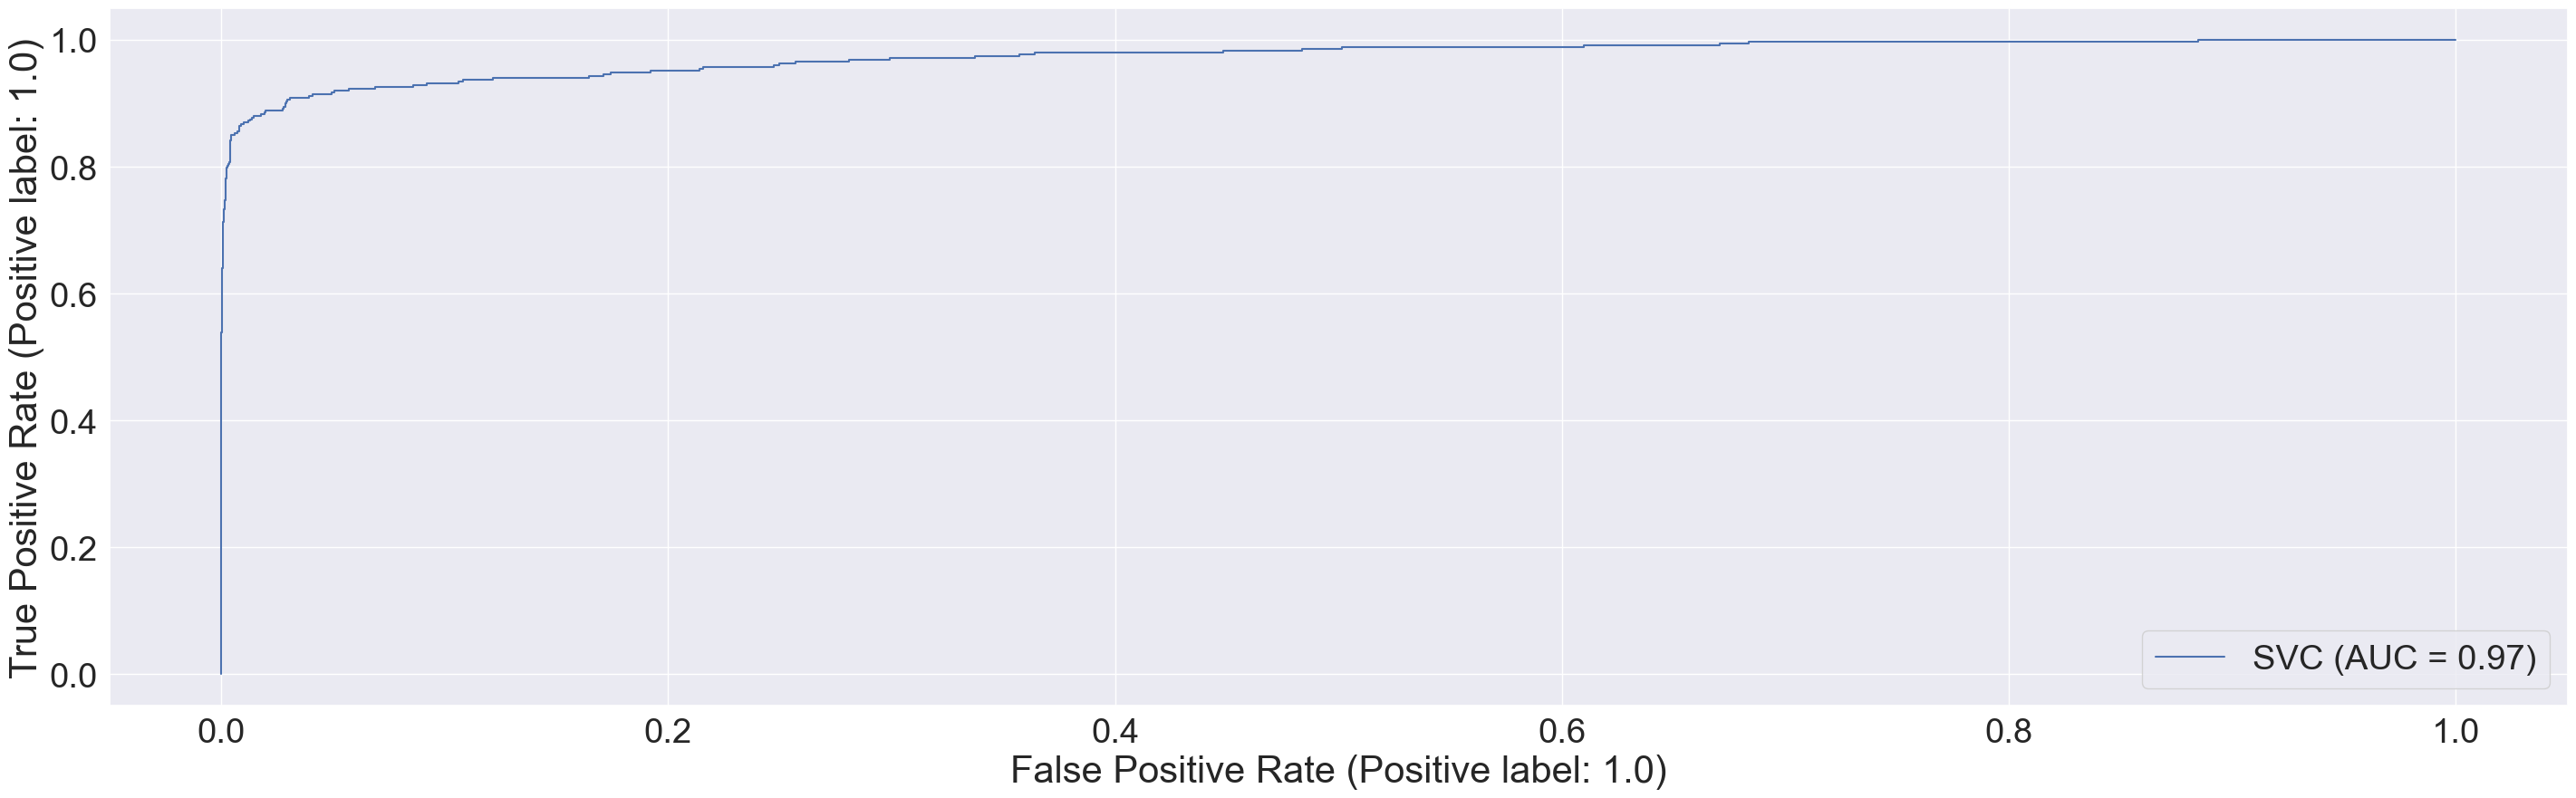

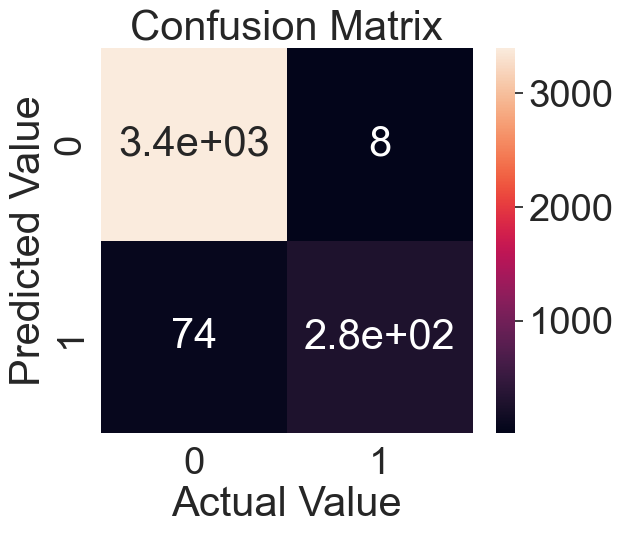

List of possible accuracy: [0.9801245210727969, 0.9760536398467433, 0.9762931034482759]

Maximum Accuracy: 98.01245210727969 %
Minimum Accuracy: 97.60536398467433 %
Overall Accuracy: 97.74904214559386 %
Standard Deviation is: 0.002284337168143991




C value =  1000.0
Train Accuracy = 0.978560839320333
Test Accuracy = 0.9792498004788508

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.97      0.80      0.88       353

    accuracy                           0.98      3759
   macro avg       0.97      0.90      0.93      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.9792498004788508
Classification error = 0.020750199521149204


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


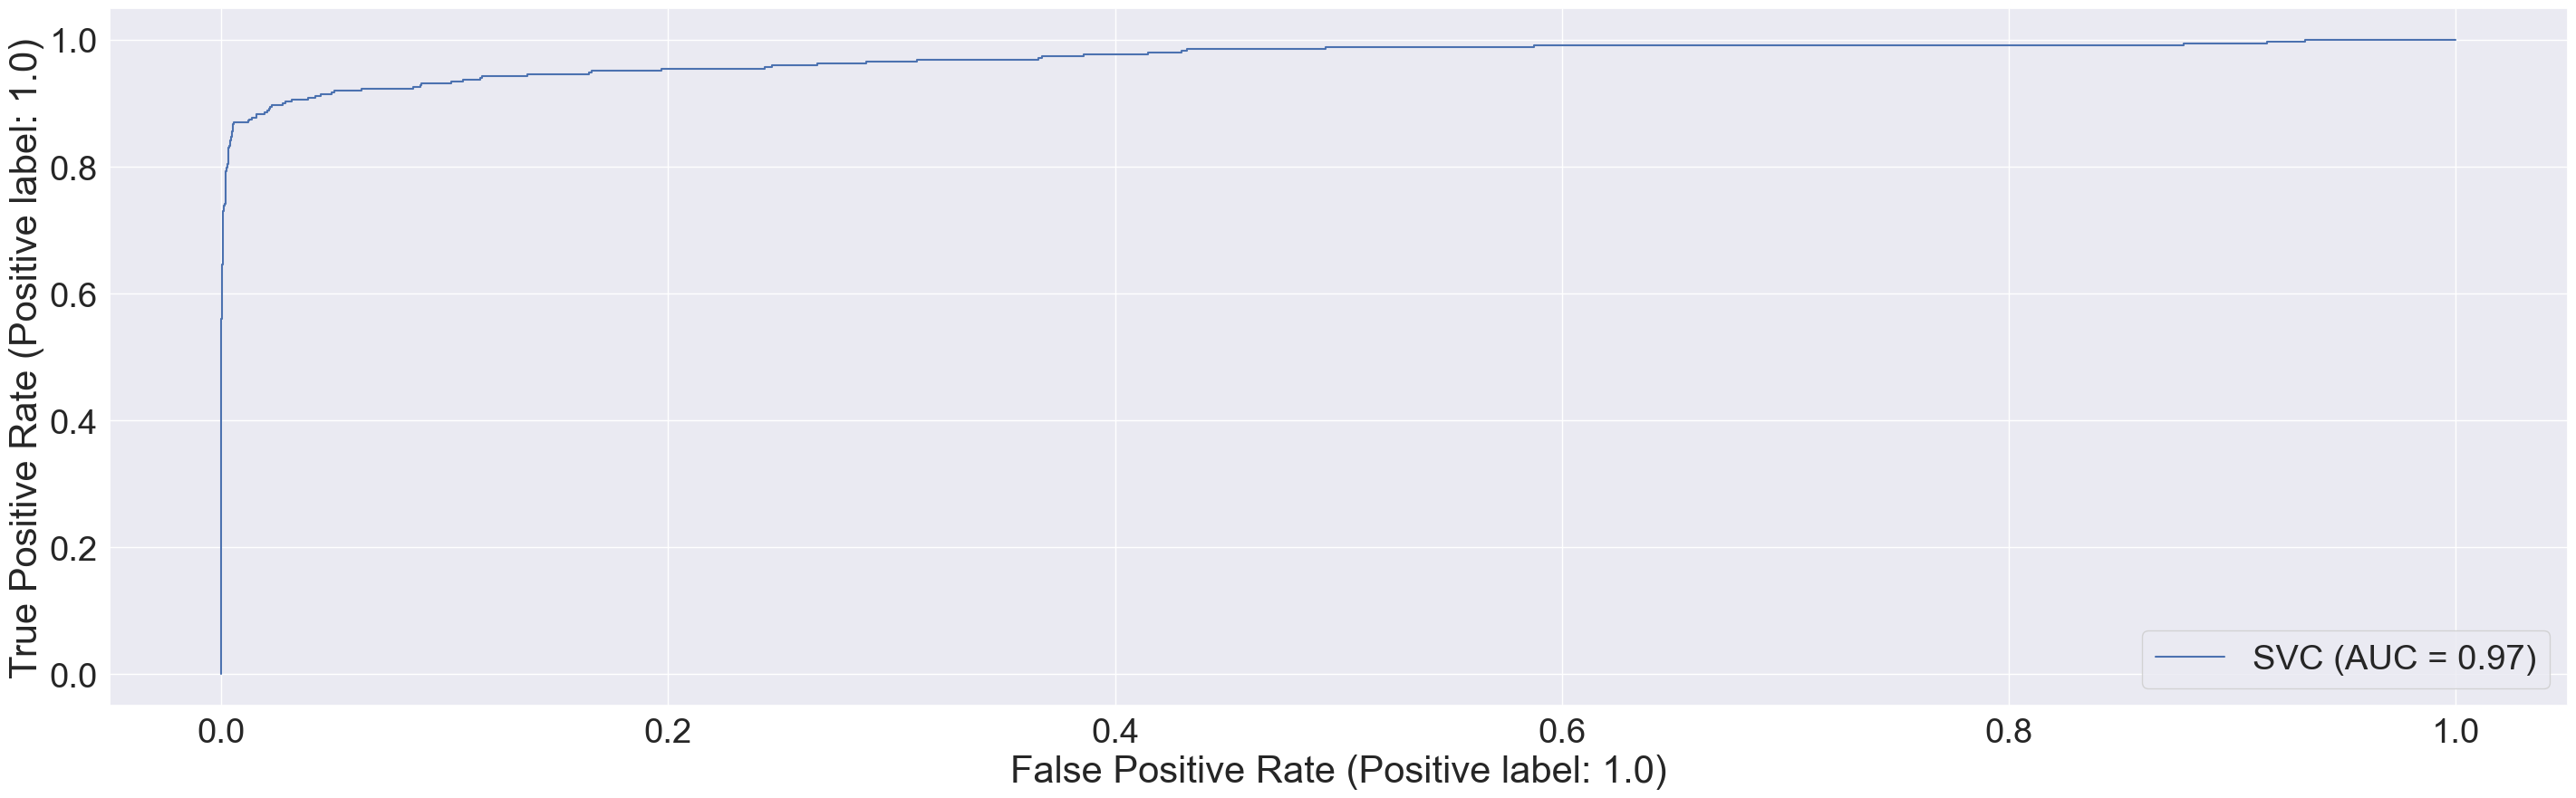

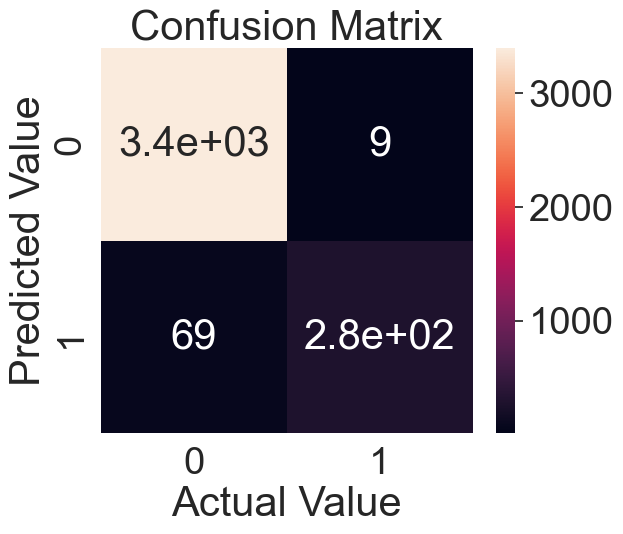

List of possible accuracy: [0.9810823754789272, 0.9770114942528736, 0.9782088122605364]

Maximum Accuracy: 98.10823754789271 %
Minimum Accuracy: 97.70114942528735 %
Overall Accuracy: 97.87675606641125 %
Standard Deviation is: 0.002092168330472709






In [22]:
for C in C_val:
    svm = SVC(kernel='rbf', C=C, gamma='auto')
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')

### 8. Run SVM with linear kernel 
#### Run SVM with linear kernel and C=1.0
#### Run SVM with linear kernel and C=100.0
#### Run SVM with linear kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 19. Stratified k-fold cross-validation with shuffle split with linear kernel

C value =  1.0
Train Accuracy = 0.9736572015053028
Test Accuracy = 0.9733971801010907

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      3406
         1.0       0.97      0.74      0.84       353

    accuracy                           0.97      3759
   macro avg       0.97      0.87      0.91      3759
weighted avg       0.97      0.97      0.97      3759

Classification accuracy = 0.9733971801010907
Classification error = 0.026602819898909336


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


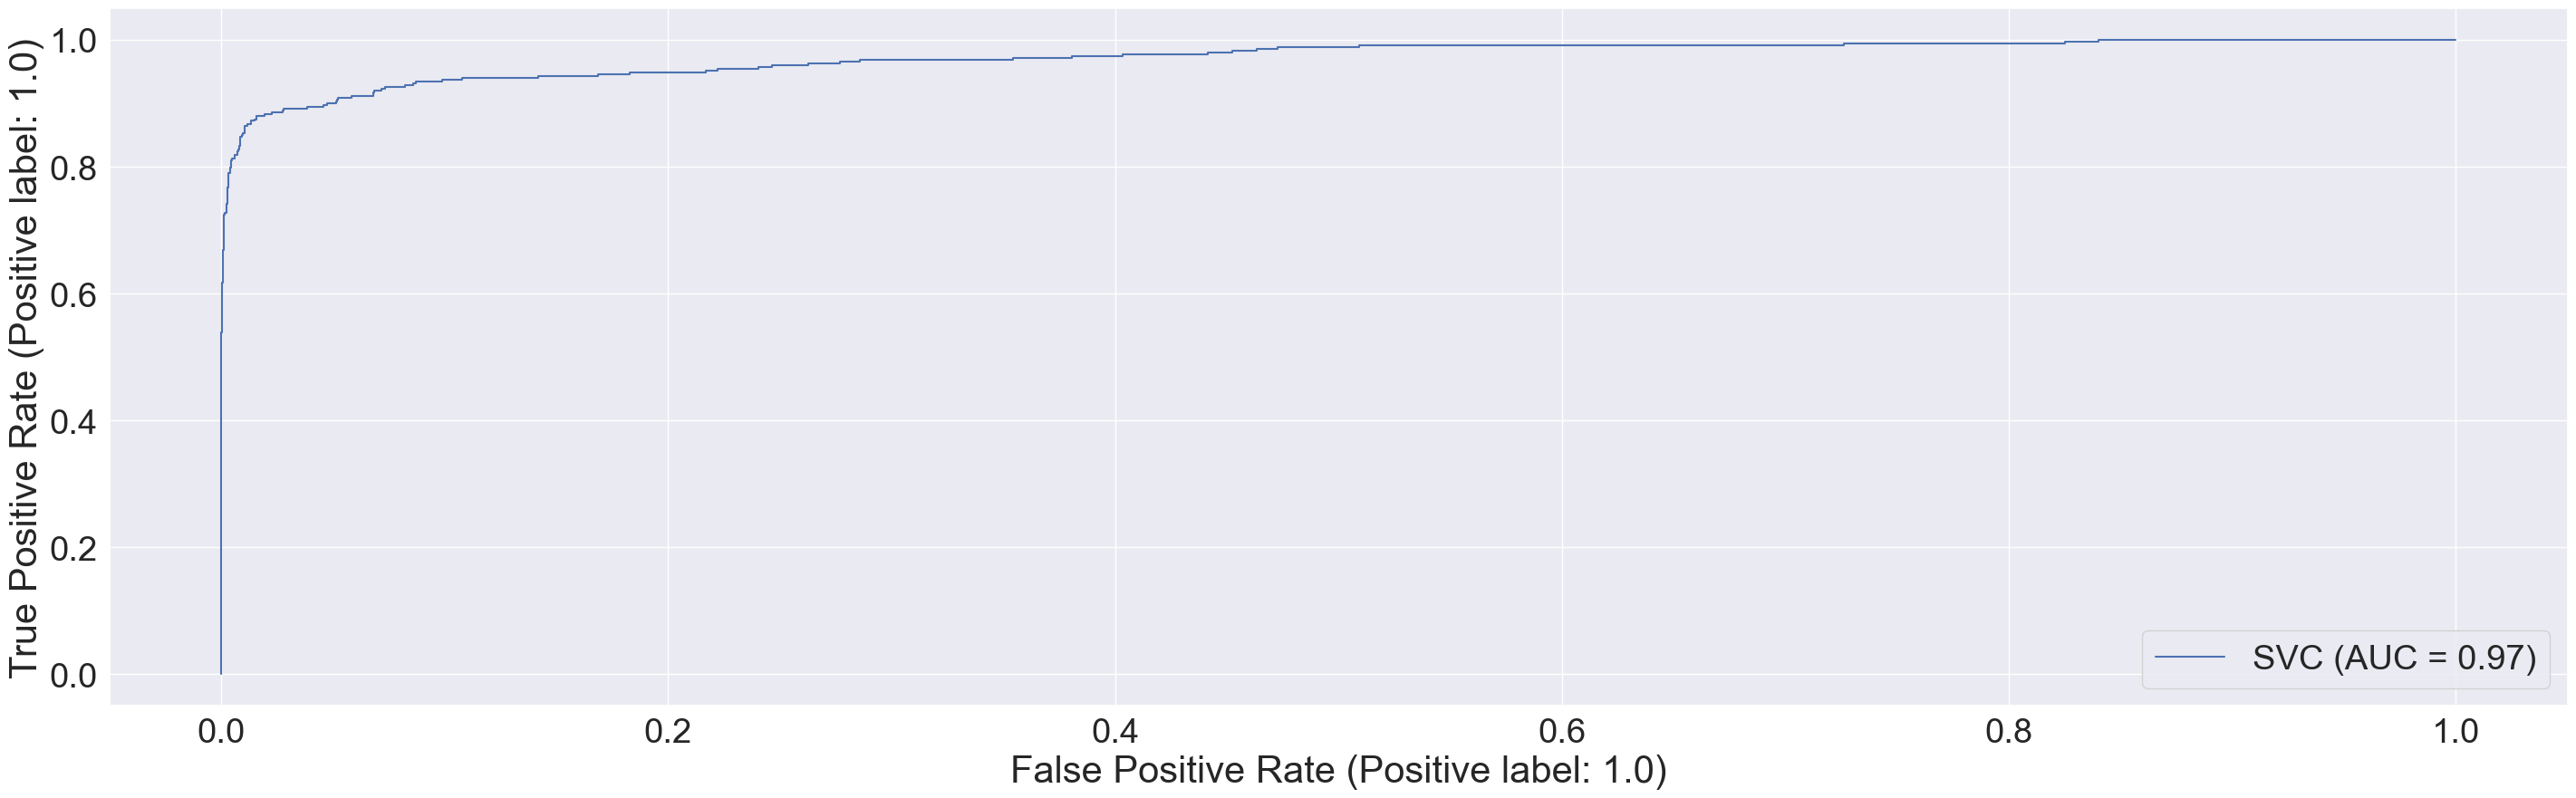

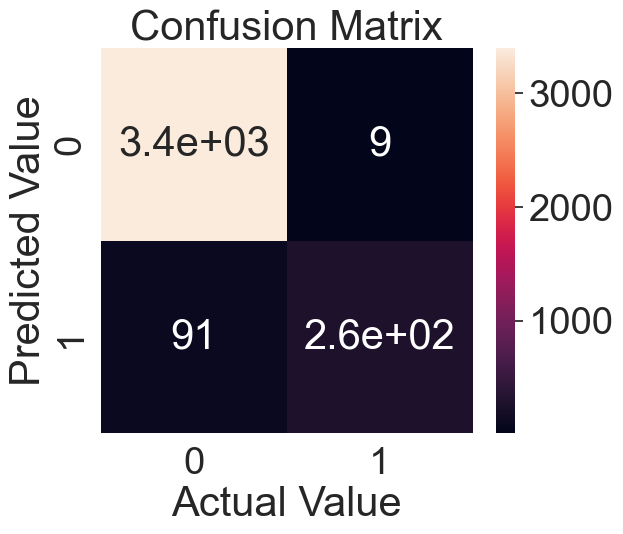

List of possible accuracy: [0.9774904214559387, 0.9727011494252874, 0.9707854406130269]

Maximum Accuracy: 97.74904214559386 %
Minimum Accuracy: 97.07854406130268 %
Overall Accuracy: 97.36590038314176 %
Standard Deviation is: 0.003453593175731758




C value =  100.0
Train Accuracy = 0.9758239251910138
Test Accuracy = 0.977121574886938

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.98      0.78      0.86       353

    accuracy                           0.98      3759
   macro avg       0.98      0.89      0.93      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.977121574886938
Classification error = 0.02287842511306204


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


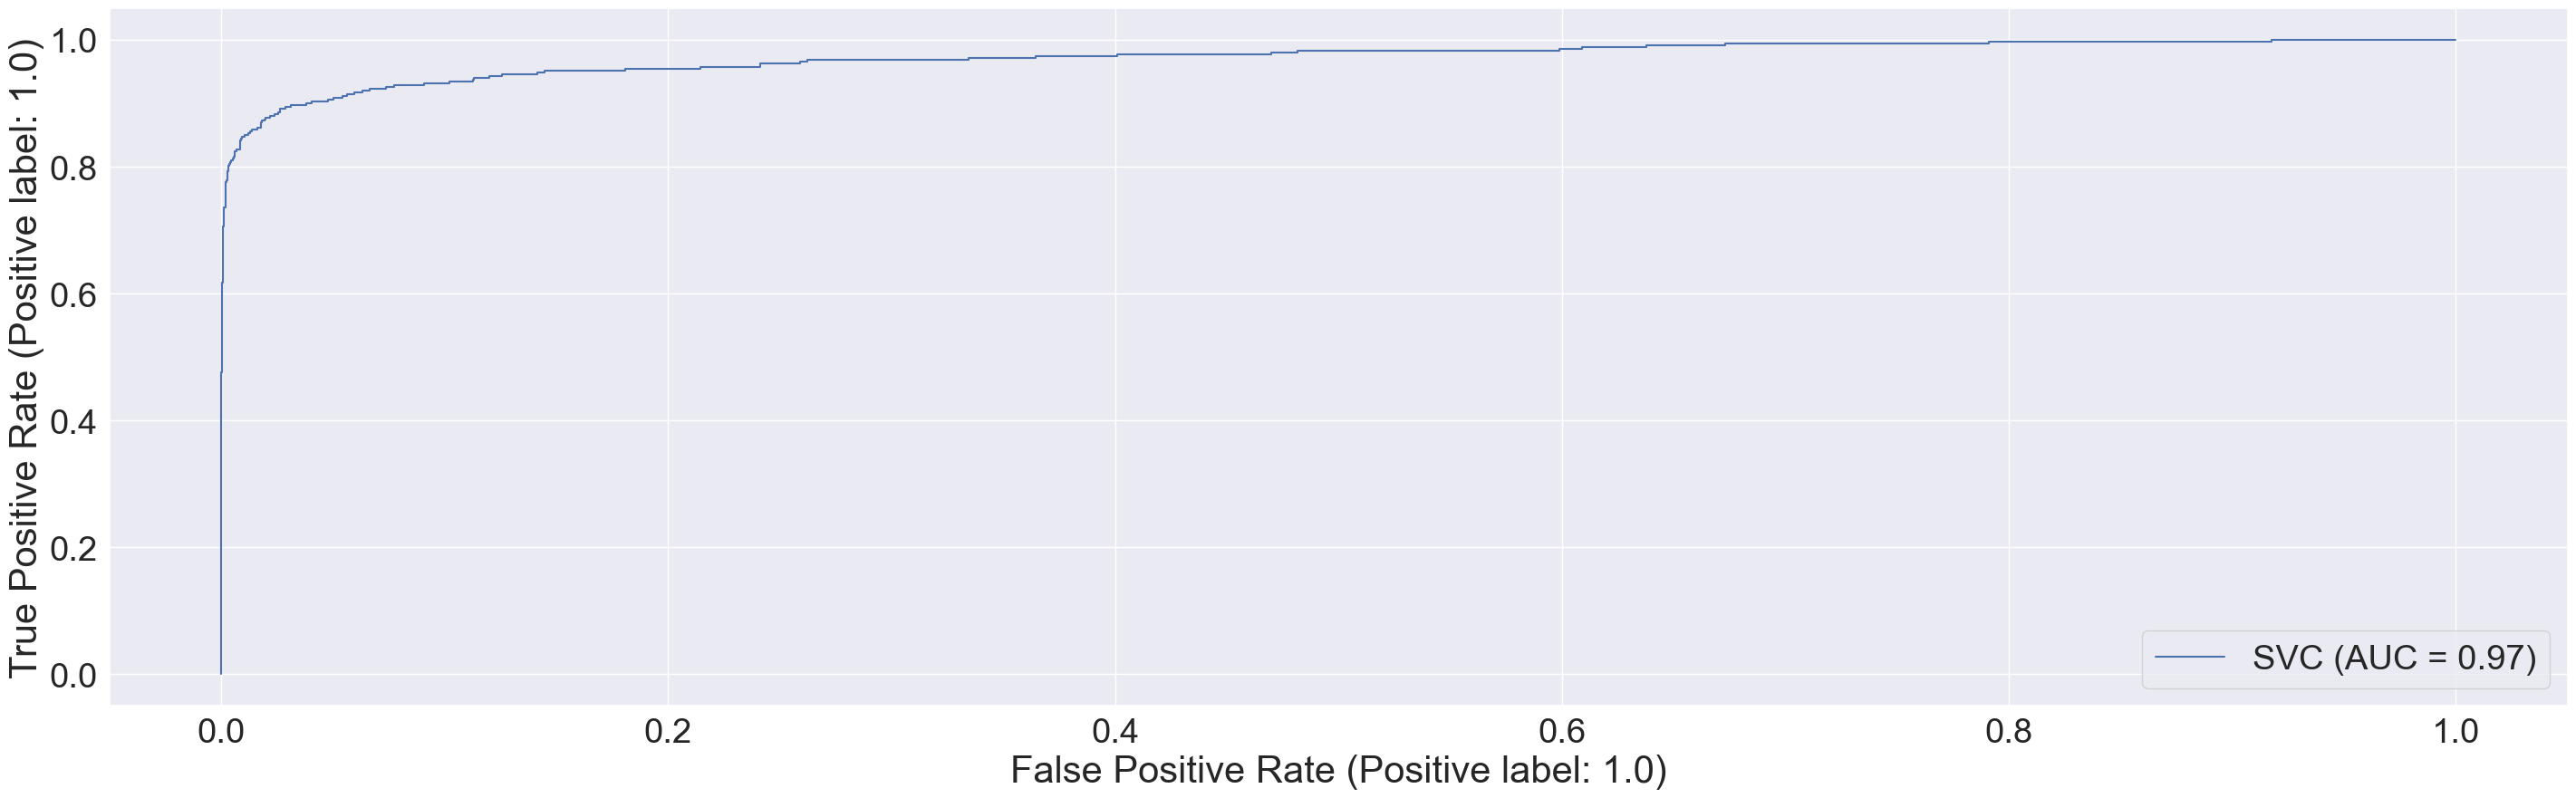

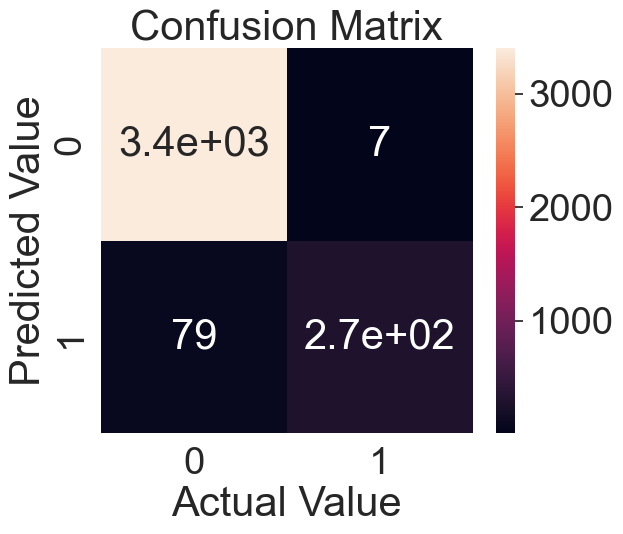

List of possible accuracy: [0.9796455938697318, 0.975095785440613, 0.9731800766283525]

Maximum Accuracy: 97.96455938697318 %
Minimum Accuracy: 97.31800766283524 %
Overall Accuracy: 97.59738186462324 %
Standard Deviation is: 0.003320984045771839




C value =  1000.0
Train Accuracy = 0.9758239251910138
Test Accuracy = 0.977121574886938

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.98      0.78      0.86       353

    accuracy                           0.98      3759
   macro avg       0.98      0.89      0.93      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.977121574886938
Classification error = 0.02287842511306204


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


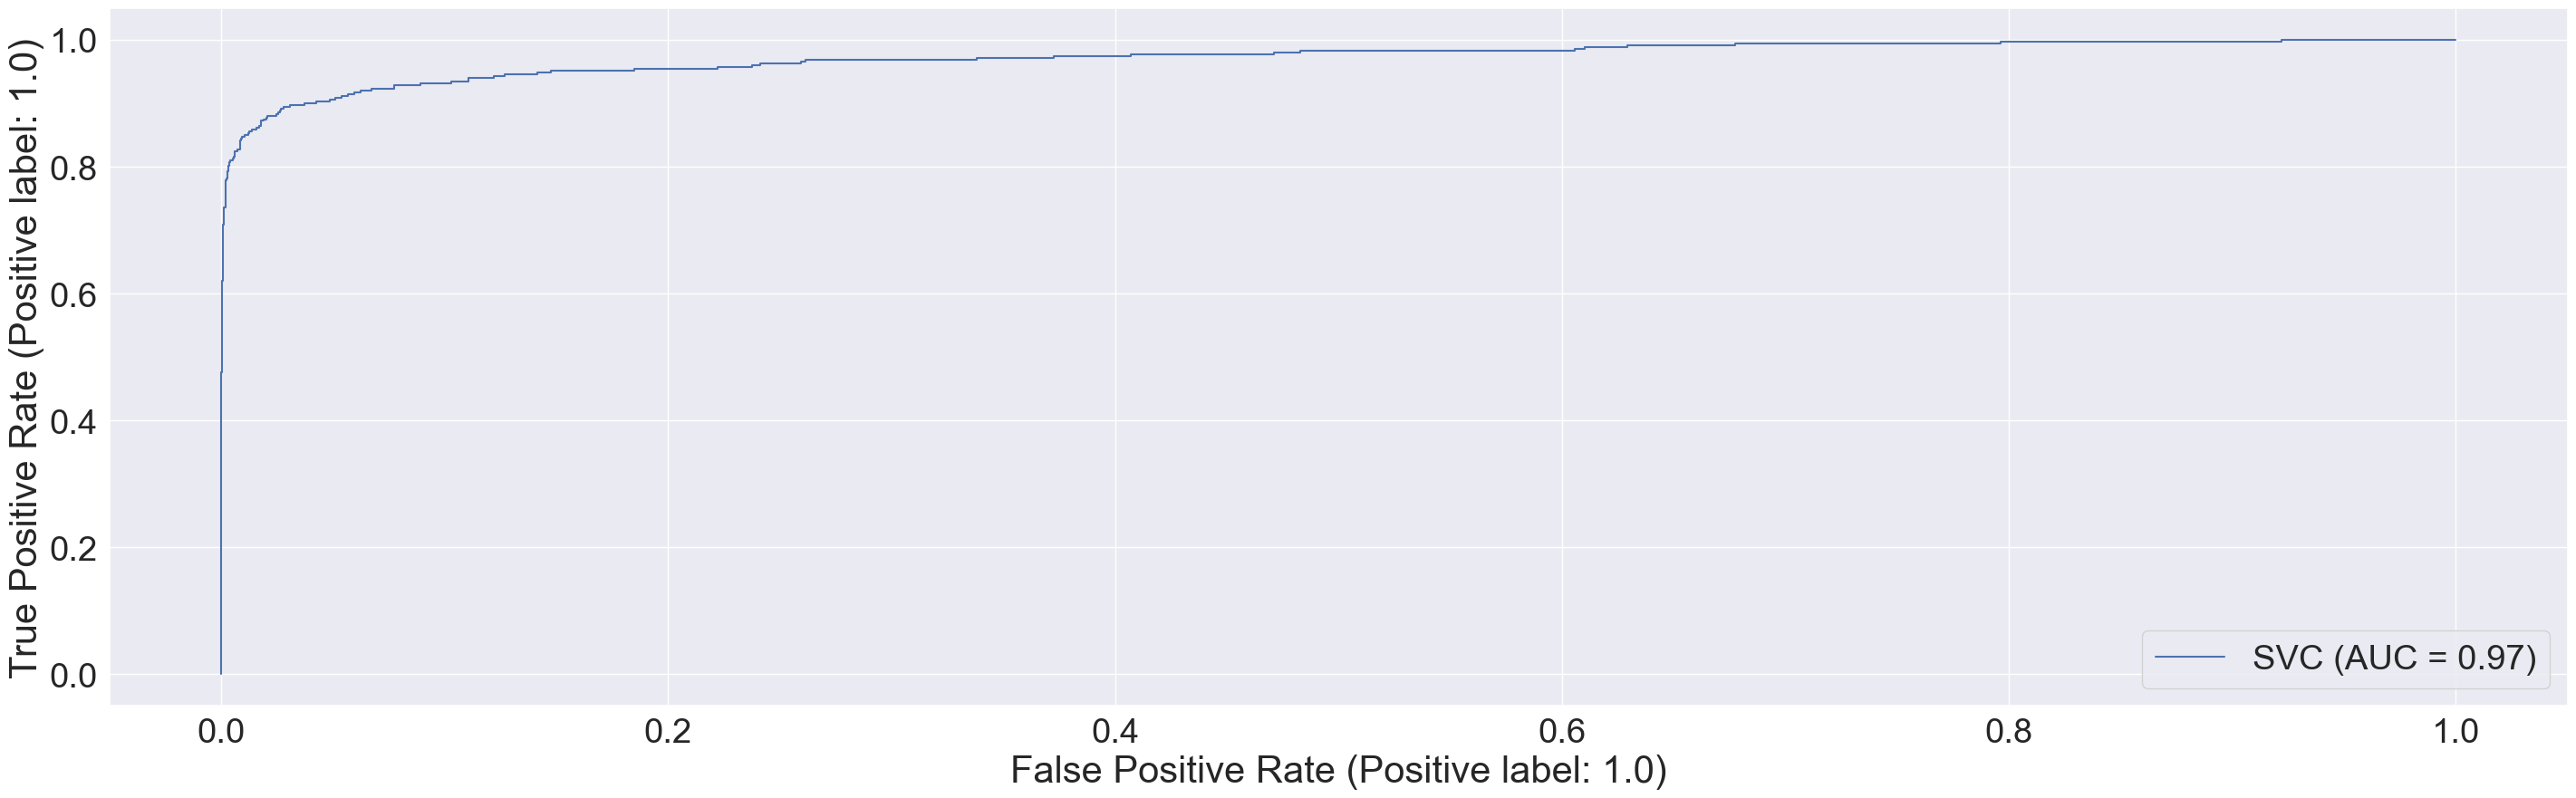

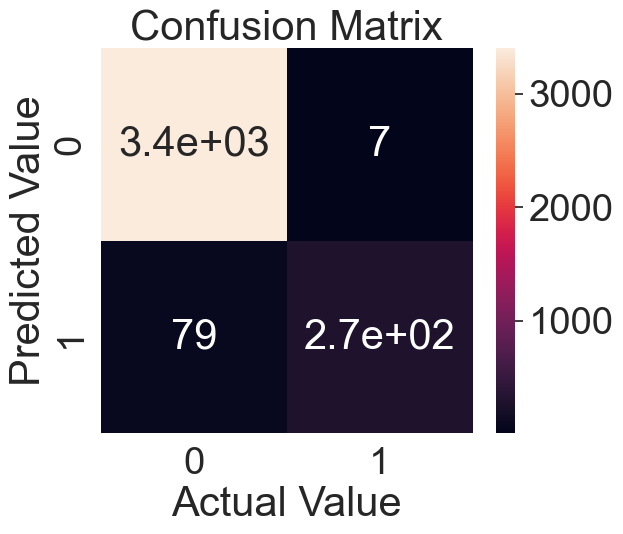

List of possible accuracy: [0.9796455938697318, 0.975095785440613, 0.9731800766283525]

Maximum Accuracy: 97.96455938697318 %
Minimum Accuracy: 97.31800766283524 %
Overall Accuracy: 97.59738186462324 %
Standard Deviation is: 0.003320984045771839






In [23]:
for C in C_val:
    svm = SVC(kernel='linear', C=C)
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')

### 9. Run SVM with polynomial kernel 
#### Run SVM with polynomial kernel and C=1.0
#### Run SVM with polynomial kernel and C=100.0
#### Run SVM with polynomial kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel

C value =  1.0
Train Accuracy = 0.9778766107880031
Test Accuracy = 0.9776536312849162

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.97      0.79      0.87       353

    accuracy                           0.98      3759
   macro avg       0.97      0.89      0.93      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.9776536312849162
Classification error = 0.022346368715083775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


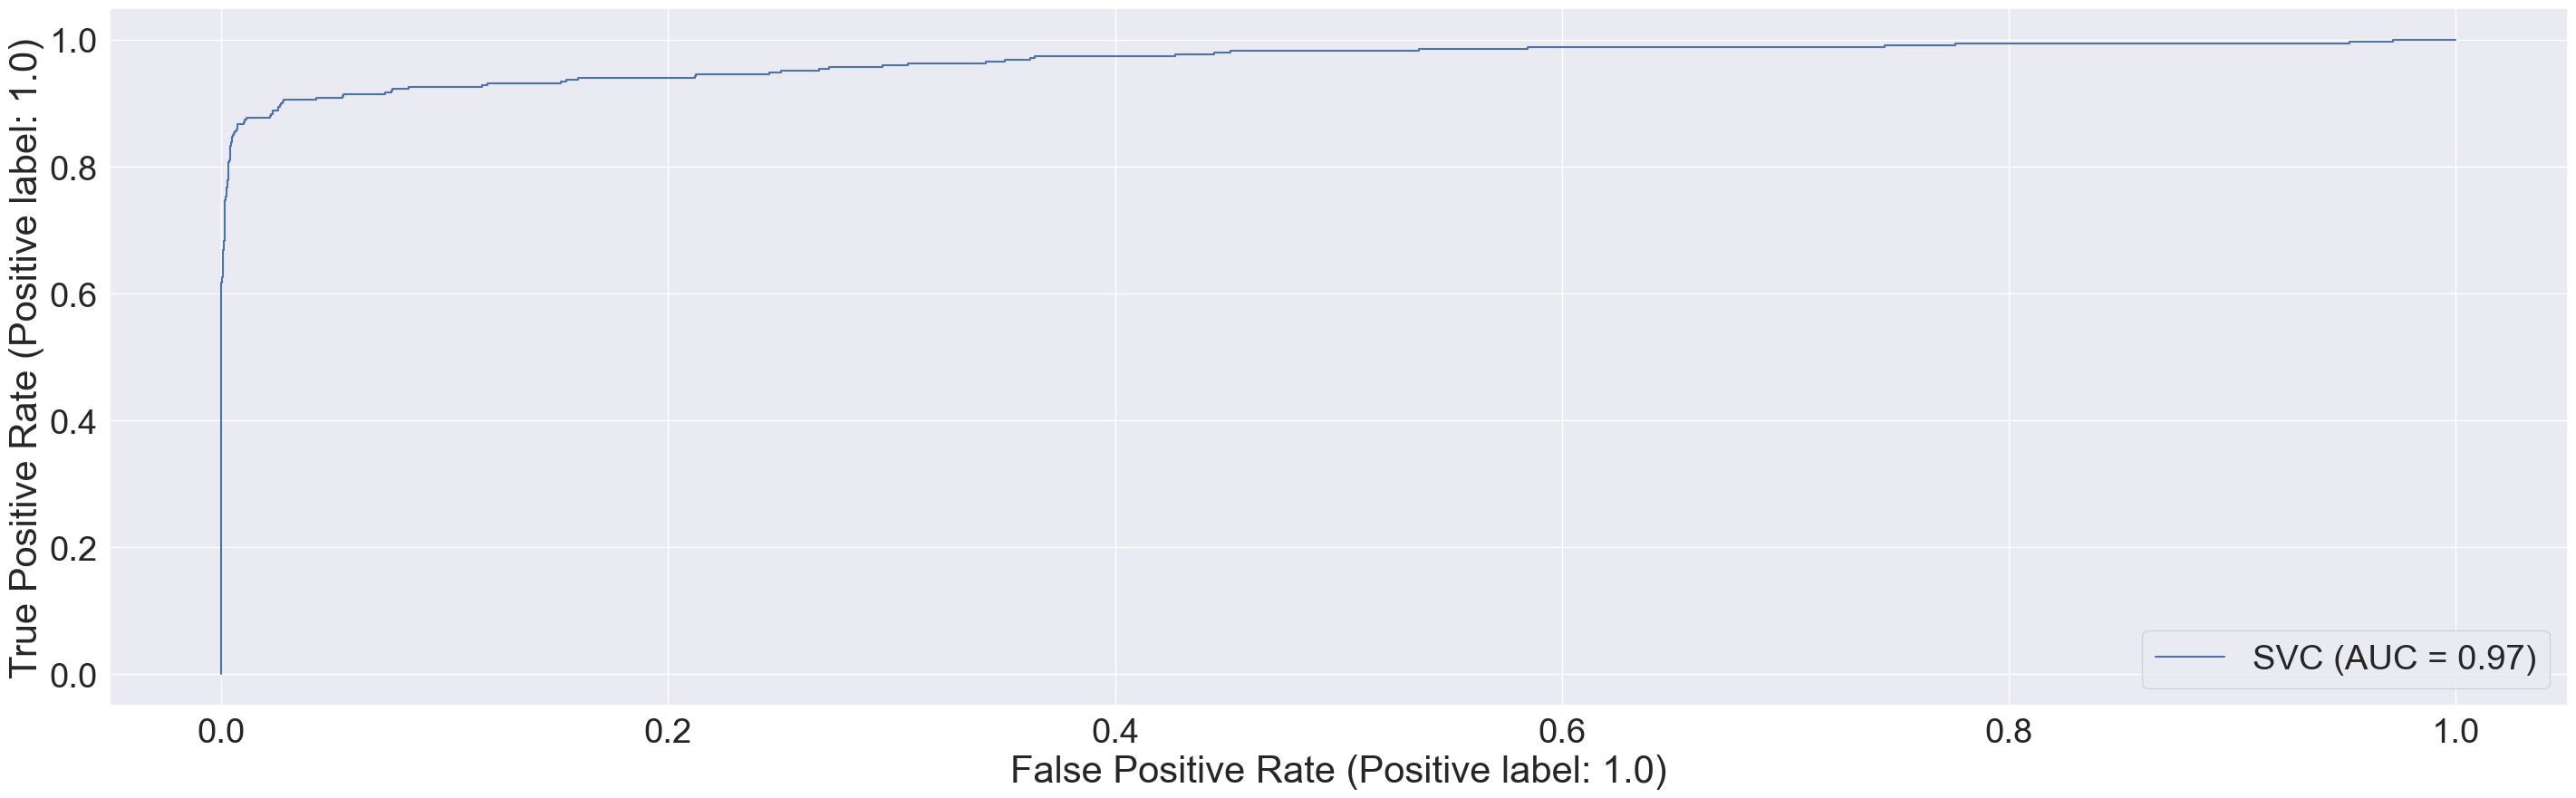

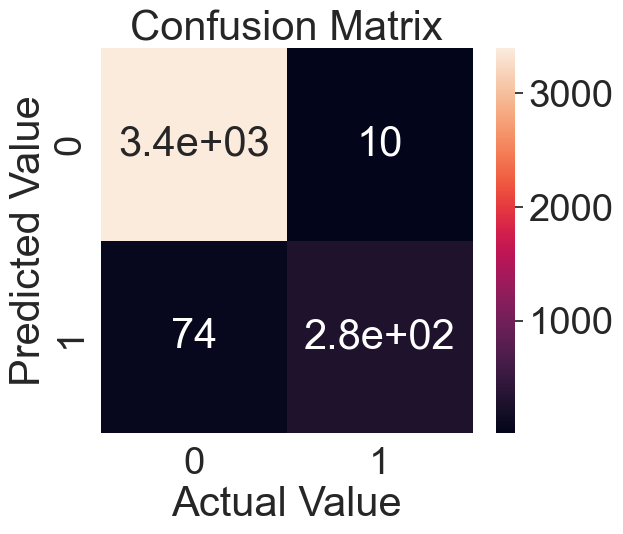

List of possible accuracy: [0.9796455938697318, 0.9758141762452107, 0.9758141762452107]

Maximum Accuracy: 97.96455938697318 %
Minimum Accuracy: 97.58141762452107 %
Overall Accuracy: 97.70913154533845 %
Standard Deviation is: 0.0022120699968951364




C value =  100.0
Train Accuracy = 0.9800433344737142
Test Accuracy = 0.9795158286778398

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.96      0.82      0.88       353

    accuracy                           0.98      3759
   macro avg       0.97      0.91      0.94      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.9795158286778398
Classification error = 0.020484171322160183


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


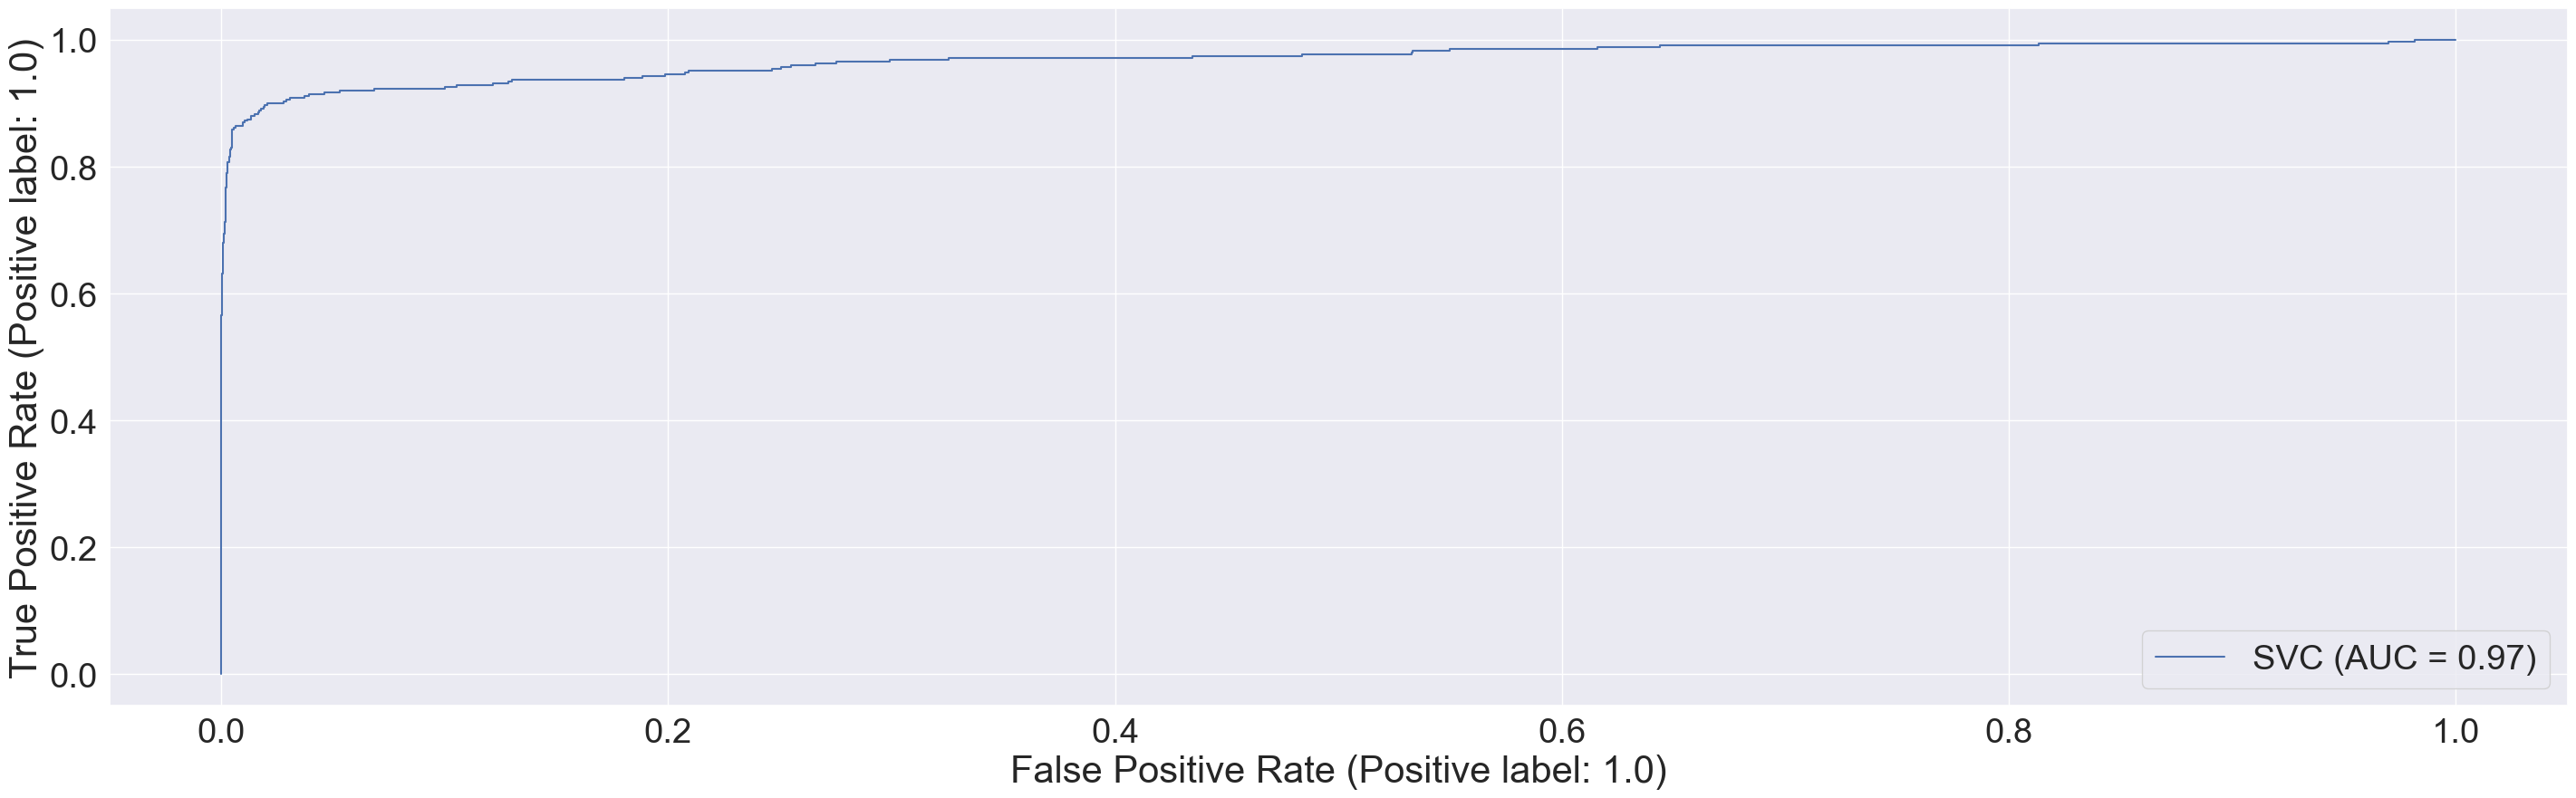

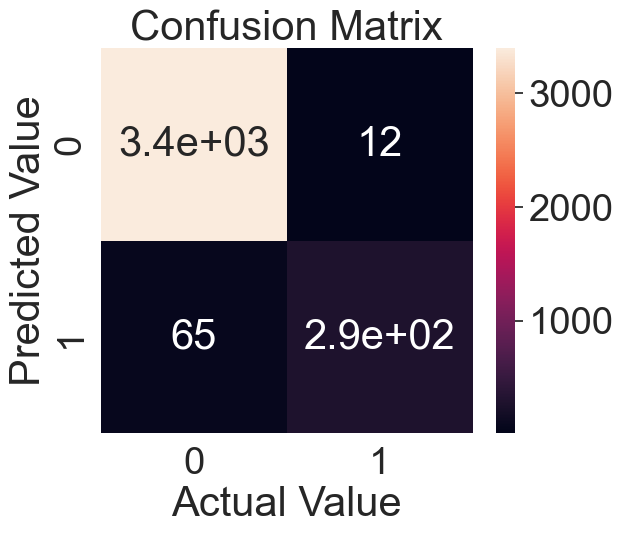

List of possible accuracy: [0.9806034482758621, 0.9779693486590039, 0.9782088122605364]

Maximum Accuracy: 98.0603448275862 %
Minimum Accuracy: 97.79693486590038 %
Overall Accuracy: 97.89272030651341 %
Standard Deviation is: 0.001456600222772579




C value =  1000.0
Train Accuracy = 0.9801573725624358
Test Accuracy = 0.9792498004788508

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3406
         1.0       0.96      0.81      0.88       353

    accuracy                           0.98      3759
   macro avg       0.97      0.90      0.93      3759
weighted avg       0.98      0.98      0.98      3759

Classification accuracy = 0.9792498004788508
Classification error = 0.020750199521149204


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


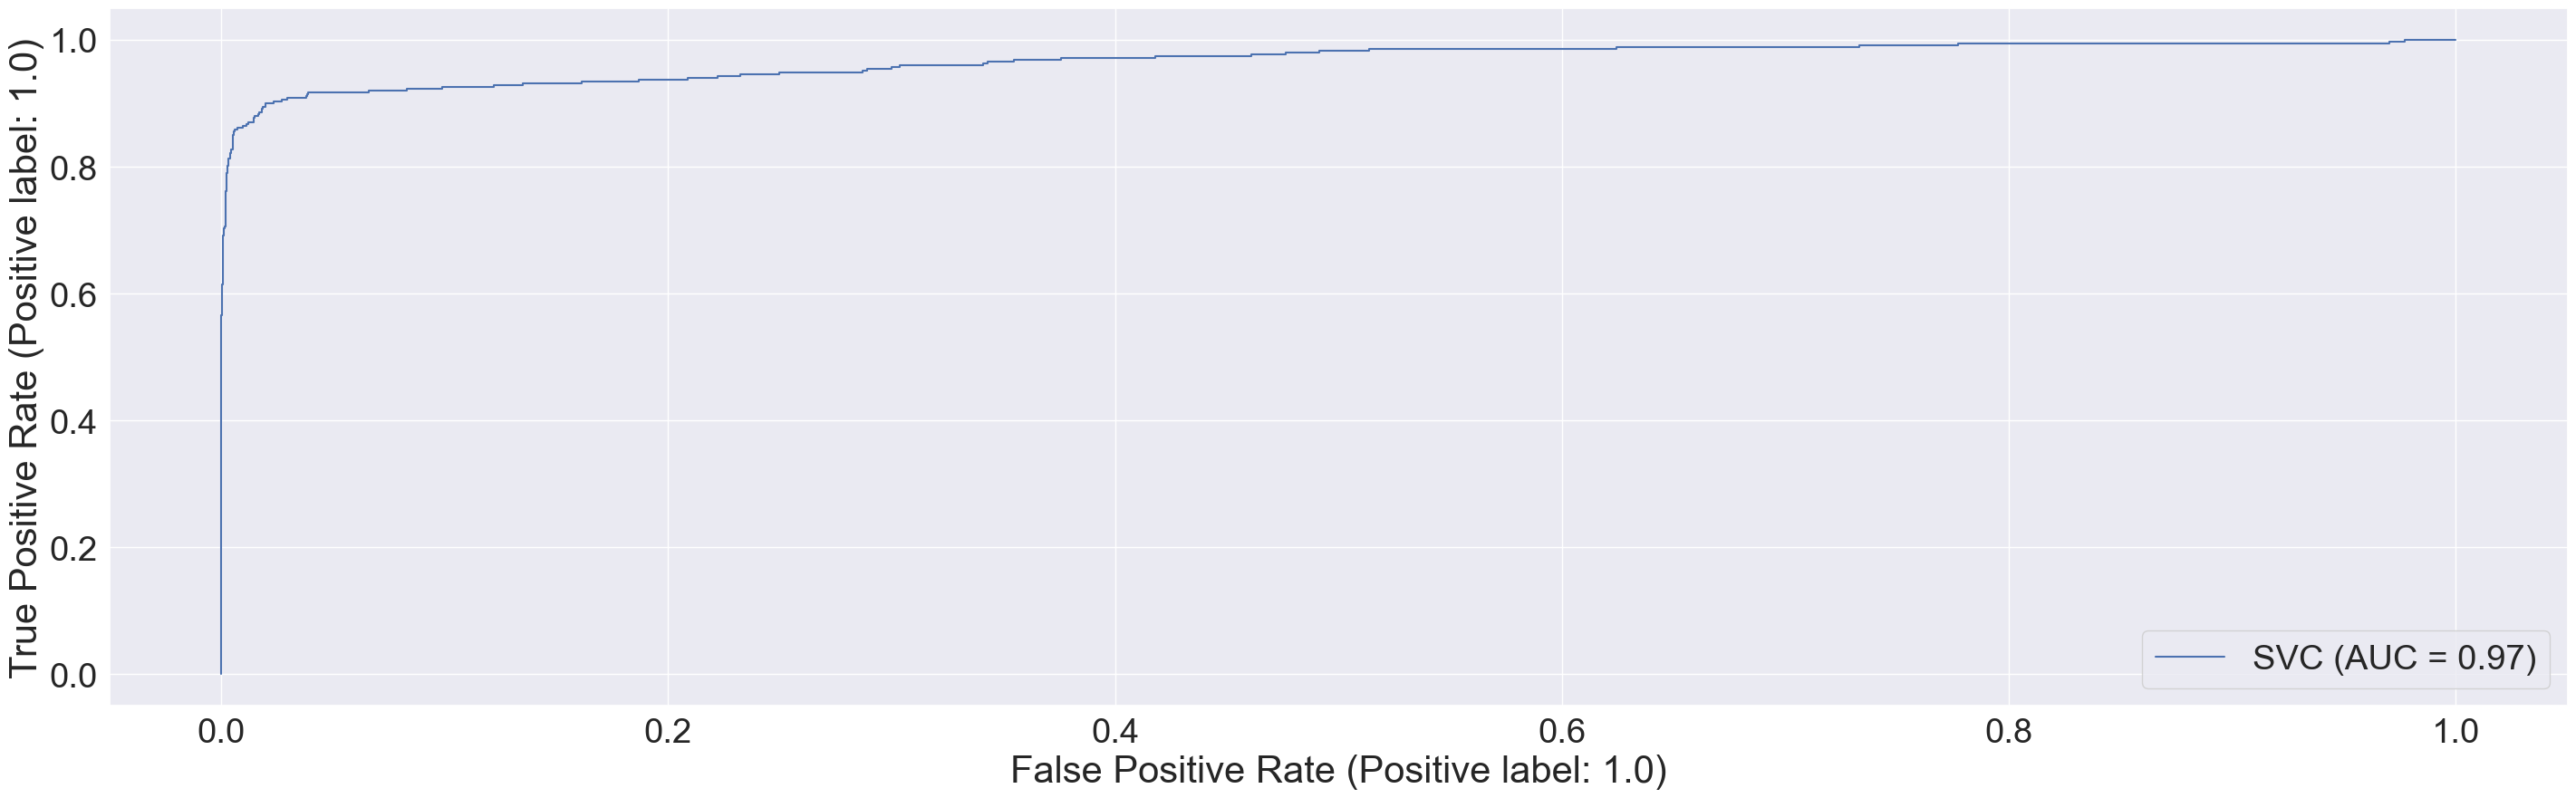

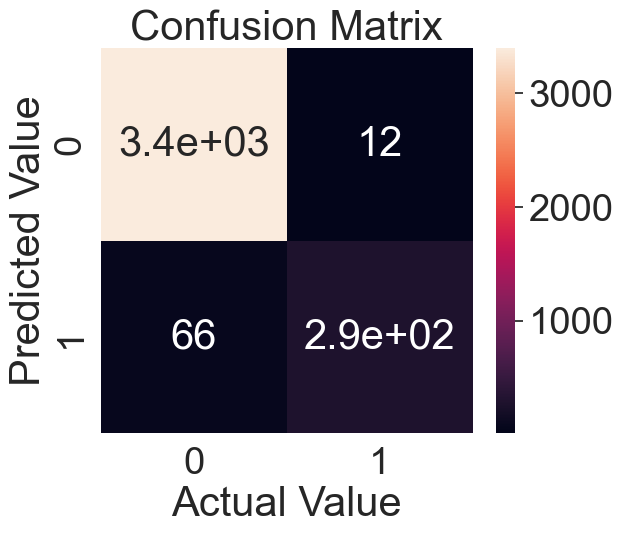

List of possible accuracy: [0.9796455938697318, 0.9779693486590039, 0.9765325670498084]

Maximum Accuracy: 97.96455938697318 %
Minimum Accuracy: 97.65325670498083 %
Overall Accuracy: 97.80491698595148 %
Standard Deviation is: 0.0015580476768792672






In [24]:
for C in C_val:
    svm = SVC(kernel='poly', C=C)
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')

### 10. Run SVM with sigmoid kernel 
#### Run SVM with sigmoid kernel and C=1.0
#### Run SVM with sigmoid kernel and C=100.0
#### Run SVM with sigmoid kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

C value =  1.0
Train Accuracy = 0.904892234006158
Test Accuracy = 0.897047086991221

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3406
         1.0       0.45      0.46      0.46       353

    accuracy                           0.90      3759
   macro avg       0.70      0.70      0.70      3759
weighted avg       0.90      0.90      0.90      3759

Classification accuracy = 0.897047086991221
Classification error = 0.10295291300877896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


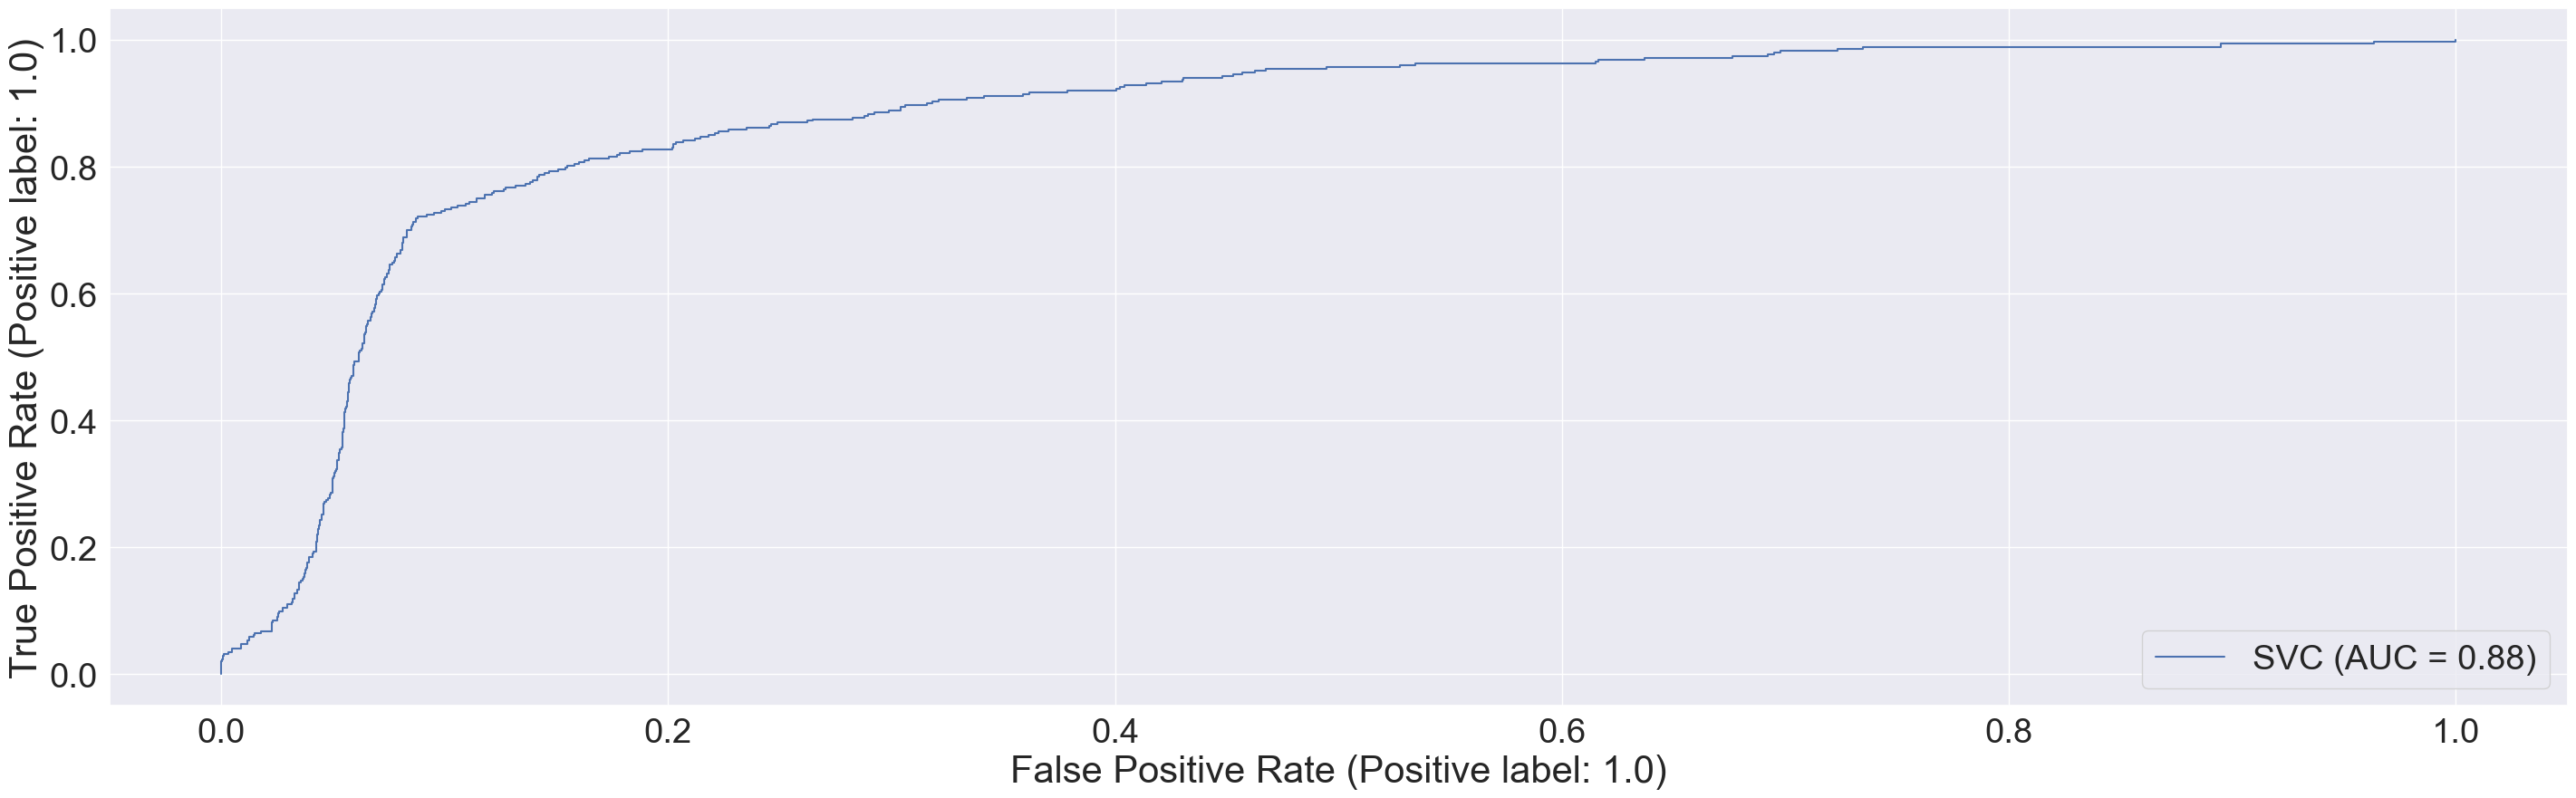

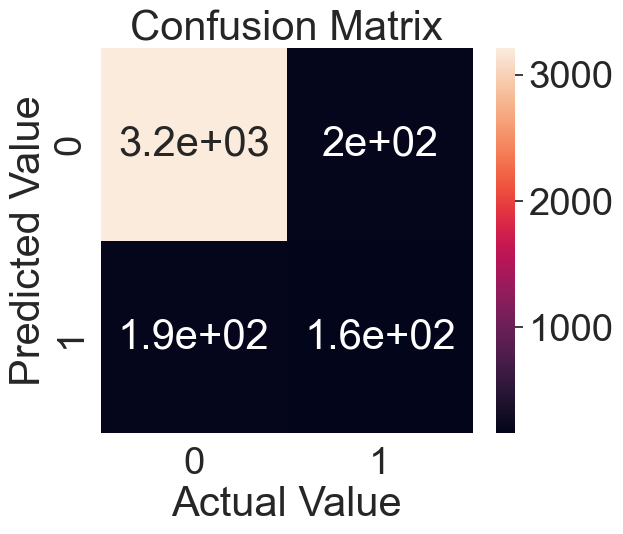

List of possible accuracy: [0.9068486590038314, 0.8975095785440613, 0.9049329501915708]

Maximum Accuracy: 90.68486590038314 %
Minimum Accuracy: 89.75095785440614 %
Overall Accuracy: 90.30970625798211 %
Standard Deviation is: 0.004932795196513492




C value =  100.0
Train Accuracy = 0.9028395484091687
Test Accuracy = 0.8919925512104283

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3406
         1.0       0.42      0.41      0.42       353

    accuracy                           0.89      3759
   macro avg       0.68      0.68      0.68      3759
weighted avg       0.89      0.89      0.89      3759

Classification accuracy = 0.8919925512104283
Classification error = 0.10800744878957169


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


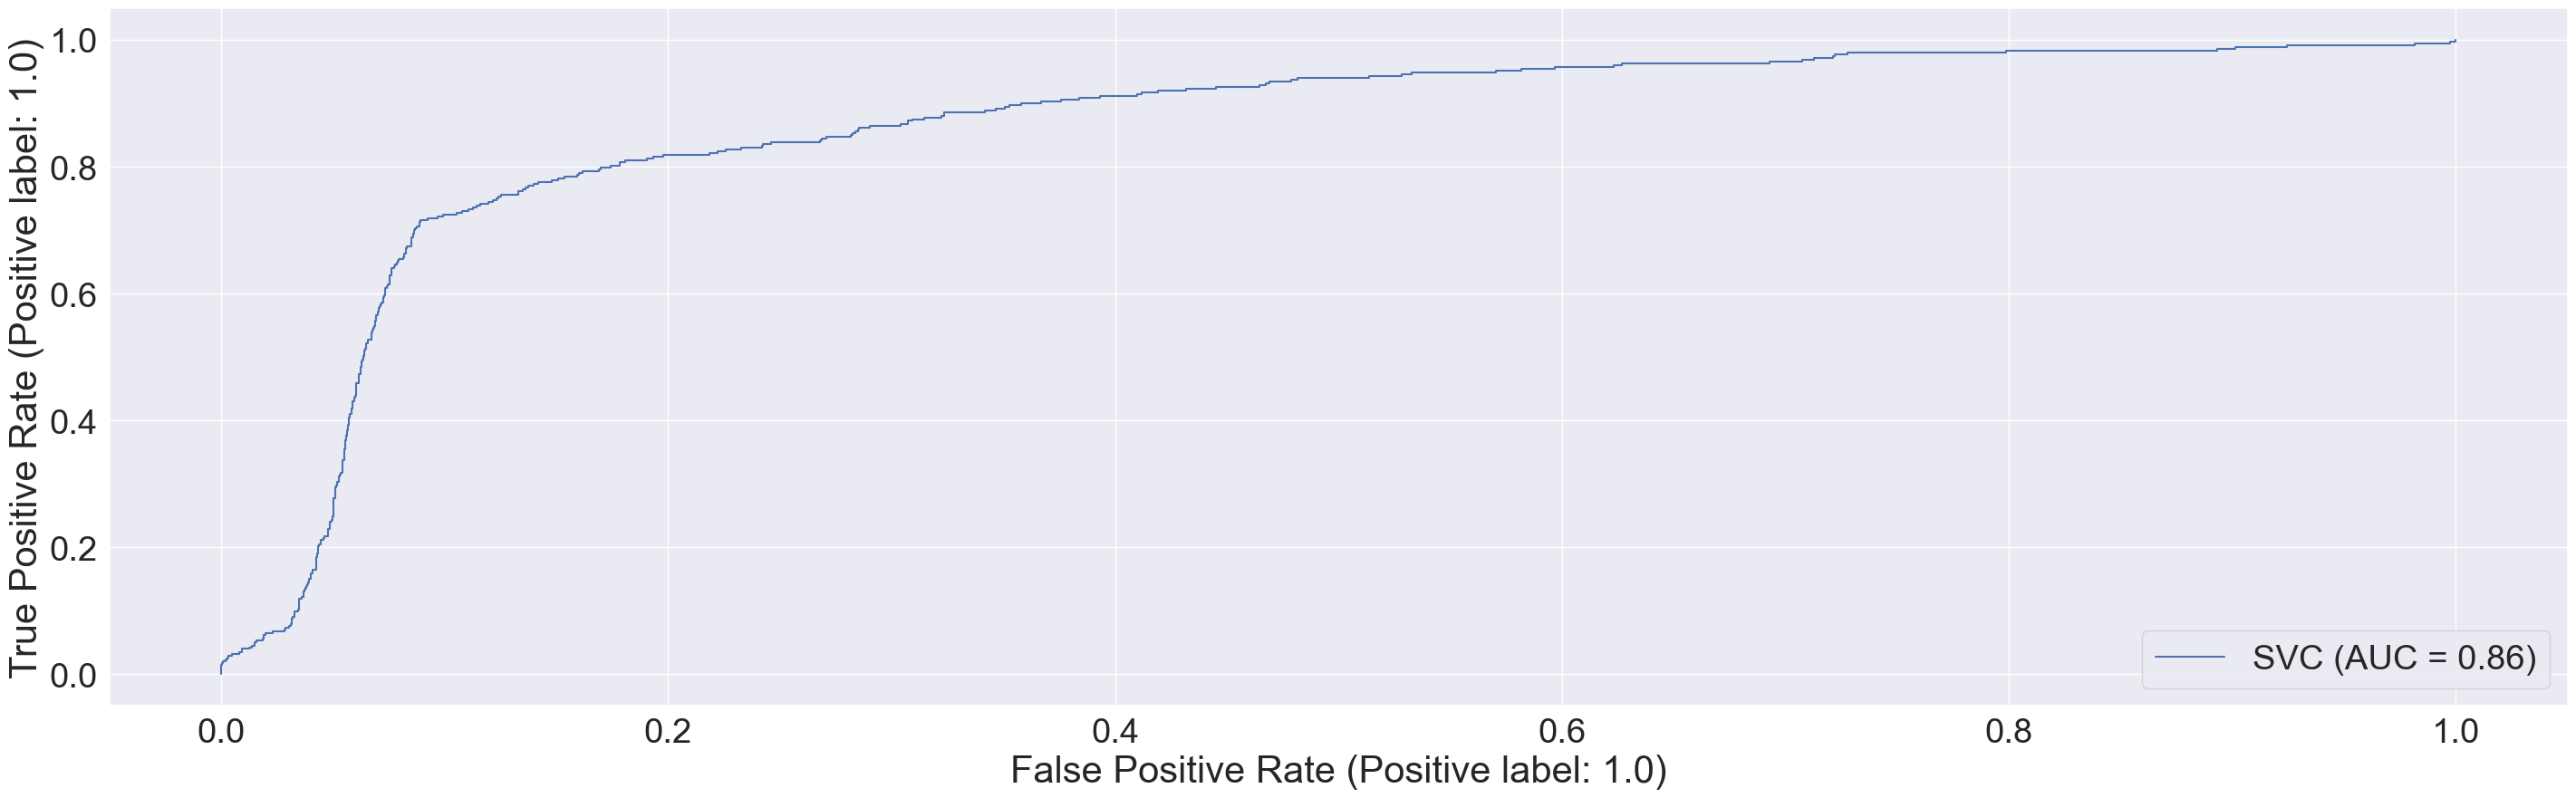

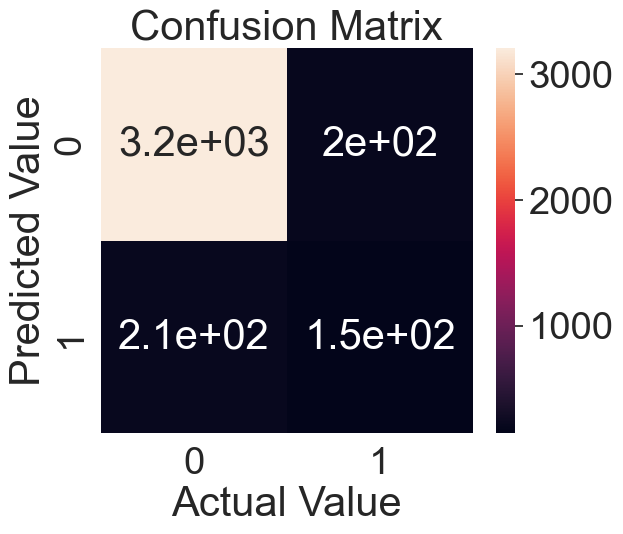

List of possible accuracy: [0.9046934865900383, 0.8948754789272031, 0.9027777777777778]

Maximum Accuracy: 90.46934865900383 %
Minimum Accuracy: 89.48754789272031 %
Overall Accuracy: 90.07822477650063 %
Standard Deviation is: 0.005204317788219358




C value =  1000.0
Train Accuracy = 0.9028395484091687
Test Accuracy = 0.8919925512104283

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3406
         1.0       0.42      0.41      0.42       353

    accuracy                           0.89      3759
   macro avg       0.68      0.68      0.68      3759
weighted avg       0.89      0.89      0.89      3759

Classification accuracy = 0.8919925512104283
Classification error = 0.10800744878957169


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


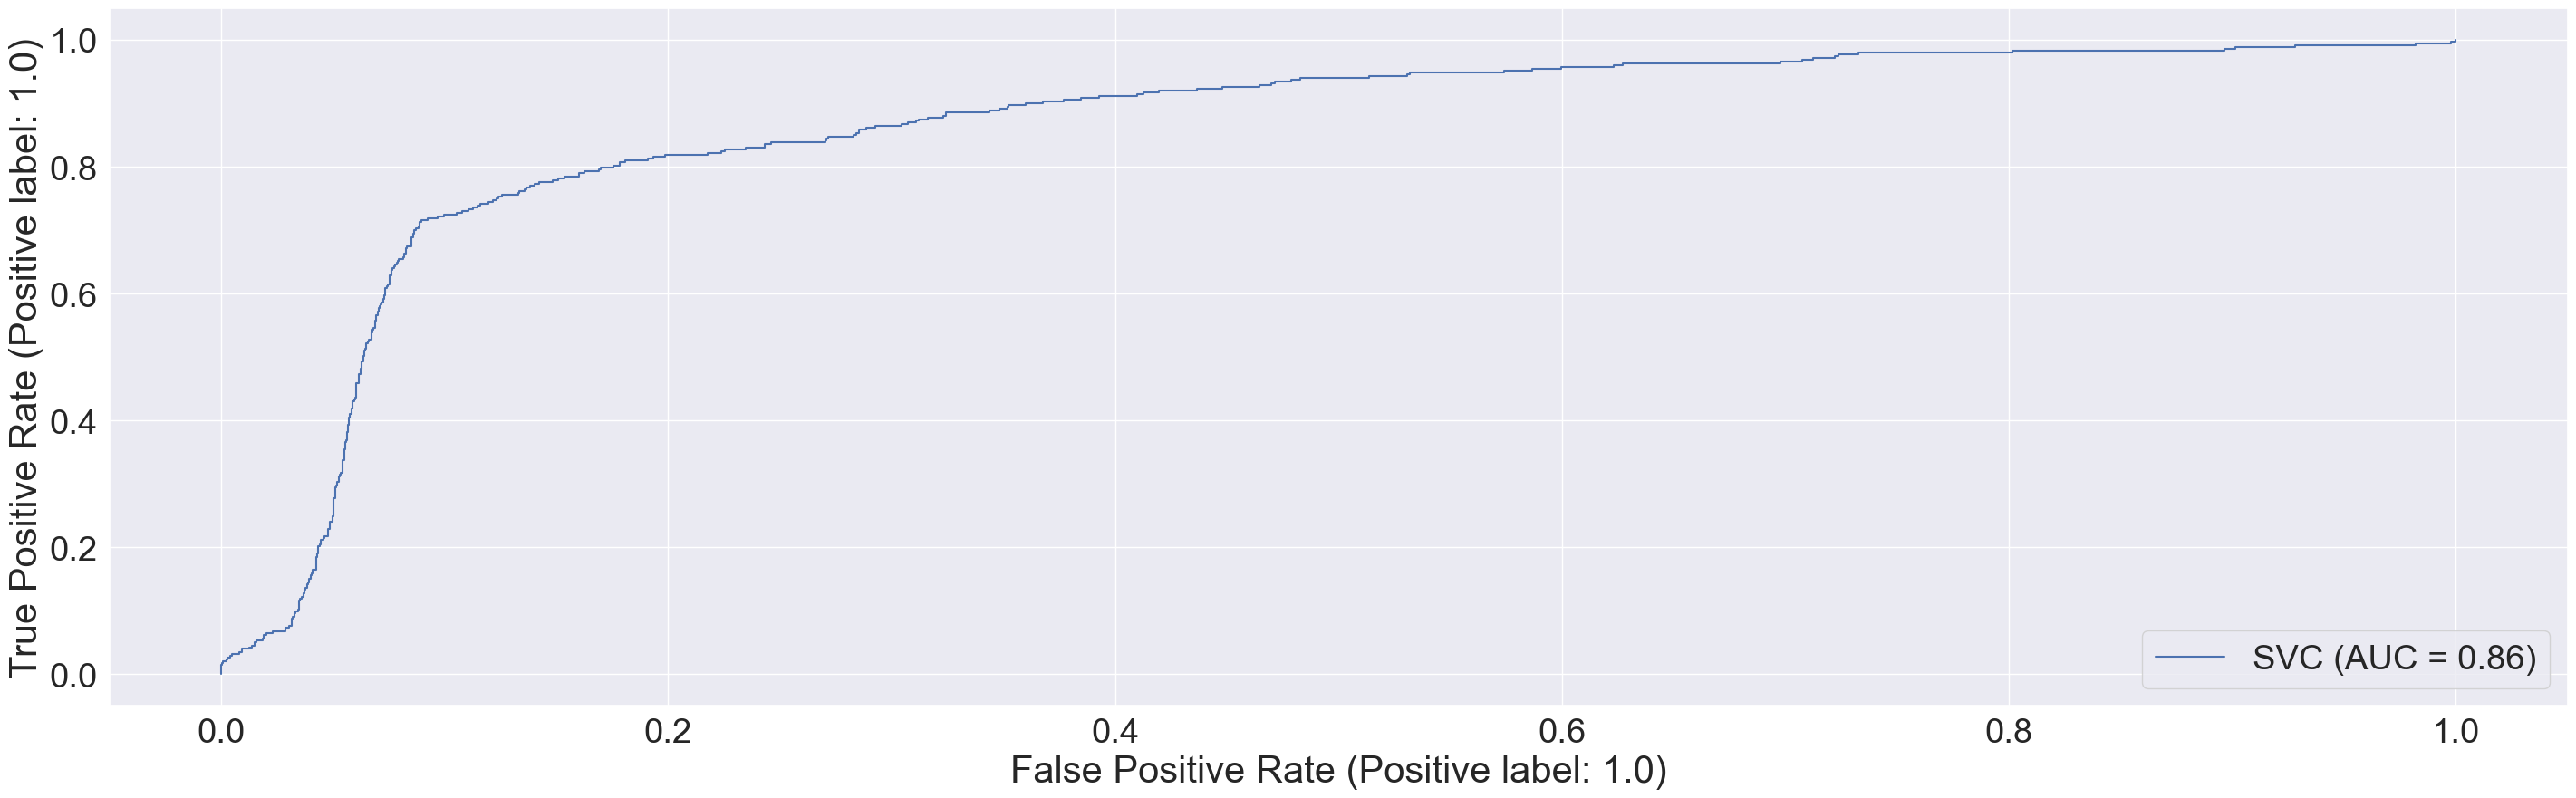

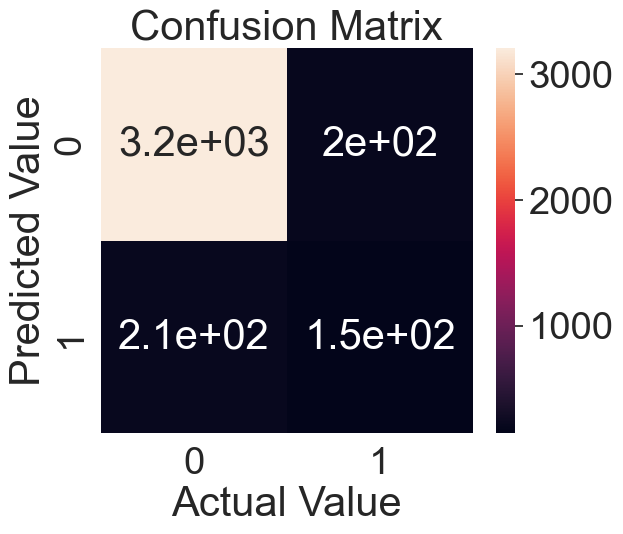

List of possible accuracy: [0.9046934865900383, 0.8948754789272031, 0.9027777777777778]

Maximum Accuracy: 90.46934865900383 %
Minimum Accuracy: 89.48754789272031 %
Overall Accuracy: 90.07822477650063 %
Standard Deviation is: 0.005204317788219358






In [25]:
for C in C_val:
    svm = SVC(kernel='sigmoid', C=C)
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')